In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Loading and Exploration**

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.describe()

Name  Epoch Date Close Approach  Relative Velocity km per hr  \
count  4.534000e+03               3.280000e+03                  3033.000000   
mean   3.268624e+06               1.178921e+12                 50516.969113   
std    5.517954e+05               1.986535e+11                 26530.144294   
min    2.000433e+06               7.889472e+11                  1207.814804   
25%    3.092344e+06               1.014365e+12                 30437.415189   
50%    3.513224e+06               1.202458e+12                 46968.245275   
75%    3.691155e+06               1.354954e+12                 65210.346095   
max    3.781897e+06               1.473318e+12                160681.487851   

       Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  \
count     3668.000000               3933.000000        3417.000000   
mean     31312.455735                  0.258221         100.709883   
std      16386.183907                  0.146070          56.938739   
min        750.489149                  0.000178           0.187669   
25%      18843.393552                  0.135807          52.877514   
50%      28959.416222                  0.265281         104.261452   
75%      40331.941346                  0.387033         150.434433   
max      99841.227826                  0.499884         194.359650   

       Miss Dist.(kilometers)  Miss Dist.(miles)  Jupiter Tisserand Invariant  \
count            3.166000e+03       3.882000e+03                  2802.000000   
mean             3.842441e+07       2.391178e+07                     5.126265   
std              2.207442e+07       1.357595e+07                     1.197144   
min              2.660989e+04       1.653462e+04                     2.367000   
25%              1.950318e+07       1.246634e+07                     4.179250   
50%              3.987901e+07       2.476464e+07                     5.102500   
75%              5.769962e+07       3.581782e+07                     6.043000   
max              7.478160e+07       4.646713e+07                     9.025000   

       Epoch Osculation  Semi Major Axis  Asc Node Longitude  Perihelion Arg  \
count      3.007000e+03      3346.000000         3438.000000     3400.000000   
mean       2.457720e+06         1.358242          172.185790      185.148924   
std        9.248399e+02         0.465313          103.055919      103.417240   
min        2.450936e+06         0.615920            0.001941        0.006918   
25%        2.458000e+06         0.990008           83.288427       96.100513   
50%        2.458000e+06         1.223551          173.895246      192.420121   
75%        2.458000e+06         1.626350          253.635285      273.067950   
max        2.458000e+06         2.568553          359.905890      359.993098   

       Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  \
count    3719.000000     2.970000e+03   3616.000000  3026.000000   
mean        1.898115     2.457741e+06    182.735237     0.761090   
std         0.834499     9.155433e+02    107.757042     0.337745   
min         0.803765     2.450100e+06      0.003191     0.239363   
25%         1.260397     2.457826e+06     87.066671     0.483841   
50%         1.590005     2.457976e+06    189.051112     0.737684   
75%         2.331365     2.458109e+06    278.038676     1.002870   
max         4.662158     2.458706e+06    359.917991     1.946801   

       approach_year  approach_month  approach_day  
count    3715.000000     3006.000000   3991.000000  
mean     2006.920592        6.474385     14.896517  
std         6.292621        3.462926      5.717762  
min      1995.000000        1.000000      1.000000  
25%      2002.000000        3.000000      8.000000  
50%      2008.000000        7.000000     15.000000  
75%      2013.000000       10.000000     22.000000  
max      2016.000000       12.000000     22.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4534 non-null   int64  
 1   Epoch Date Close Approach     3280 non-null   float64
 2   Relative Velocity km per sec  3184 non-null   object 
 3   Relative Velocity km per hr   3033 non-null   float64
 4   Miles per hour                3668 non-null   float64
 5   Miss Dist.(Astronomical)      3933 non-null   float64
 6   Miss Dist.(lunar)             3417 non-null   float64
 7   Miss Dist.(kilometers)        3166 non-null   float64
 8   Miss Dist.(miles)             3882 non-null   float64
 9   Jupiter Tisserand Invariant   2802 non-null   float64
 10  Epoch Osculation              3007 non-null   float64
 11  Semi Major Axis               3346 non-null   float64
 12  Asc Node Longitude            3438 non-null   float64
 13  Per

In [ ]:
x = df.isnull().sum().sum()
print(x)

print(x*100/(df.shape[0]*df.shape[1]))

25378
23.321937950301425


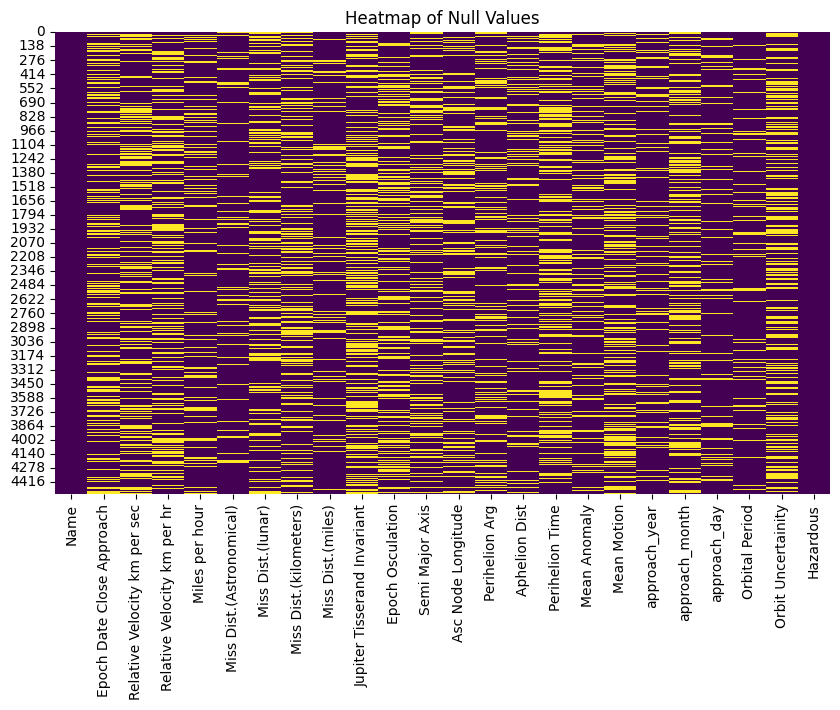

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

plt.title('Heatmap of Null Values')
plt.show()

# **SELECTING RELEVANT FEATURES**


In [ ]:
df.drop(columns=['Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Name'], inplace=True)
# These values contain the same information provided in different units, so they can be directly removed.


In [ ]:
df['Hazardous'] = df['Hazardous'].astype('int64')

# Hazardous would result in 1, not hazardous would be 0.

In [ ]:
# Check unique values in the 'Orbital Period' and 'Orbit Uncertainty' columns
print(df['Orbital Period'].unique())
print(df['Orbit Uncertainity'].unique())


['Low' 'Medium' nan 'High']
['Medium' nan 'Low' 'High']


In [ ]:
# Make sure there are no extra spaces or case issues
df['Orbital Period'] = df['Orbital Period'].str.strip().str.lower()
df['Orbit Uncertainity'] = df['Orbit Uncertainity'].str.strip().str.lower()

# Define the mapping
mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply the mapping to the 'Orbital Period' and 'Orbit Uncertainty' columns
df['Orbital Period'] = df['Orbital Period'].map(mapping)
df['Orbit Uncertainity'] = df['Orbit Uncertainity'].map(mapping)

# Check the updated columns
print(df[['Orbital Period', 'Orbit Uncertainity']].head())


   Orbital Period  Orbit Uncertainity
0             0.0                 1.0
1             0.0                 NaN
2             1.0                 NaN
3             0.0                 1.0
4             NaN                 0.0


# IMPUTING NULL VALUES

In [ ]:
from sklearn.impute import KNNImputer

# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Initialize the KNN Imputer with a specified number of neighbors (default is 5)
knn_imputer = KNNImputer(n_neighbors=5)

# Step 3: Fit the imputer on the numerical columns and transform the data
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

# Step 4: Check if any missing values remain
print("Total missing values after KNN imputation:", df[numerical_cols].isnull().sum().sum())


Total missing values after KNN imputation: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Epoch Date Close Approach    4534 non-null   float64
 1   Miles per hour               4534 non-null   float64
 2   Miss Dist.(Astronomical)     4534 non-null   float64
 3   Jupiter Tisserand Invariant  4534 non-null   float64
 4   Epoch Osculation             4534 non-null   float64
 5   Semi Major Axis              4534 non-null   float64
 6   Asc Node Longitude           4534 non-null   float64
 7   Perihelion Arg               4534 non-null   float64
 8   Aphelion Dist                4534 non-null   float64
 9   Perihelion Time              4534 non-null   float64
 10  Mean Anomaly                 4534 non-null   float64
 11  Mean Motion                  4534 non-null   float64
 12  approach_year                4534 non-null   float64
 13  approach_month    

# **PLOTING CORRELATION MATRIX TO GET CORELATION**

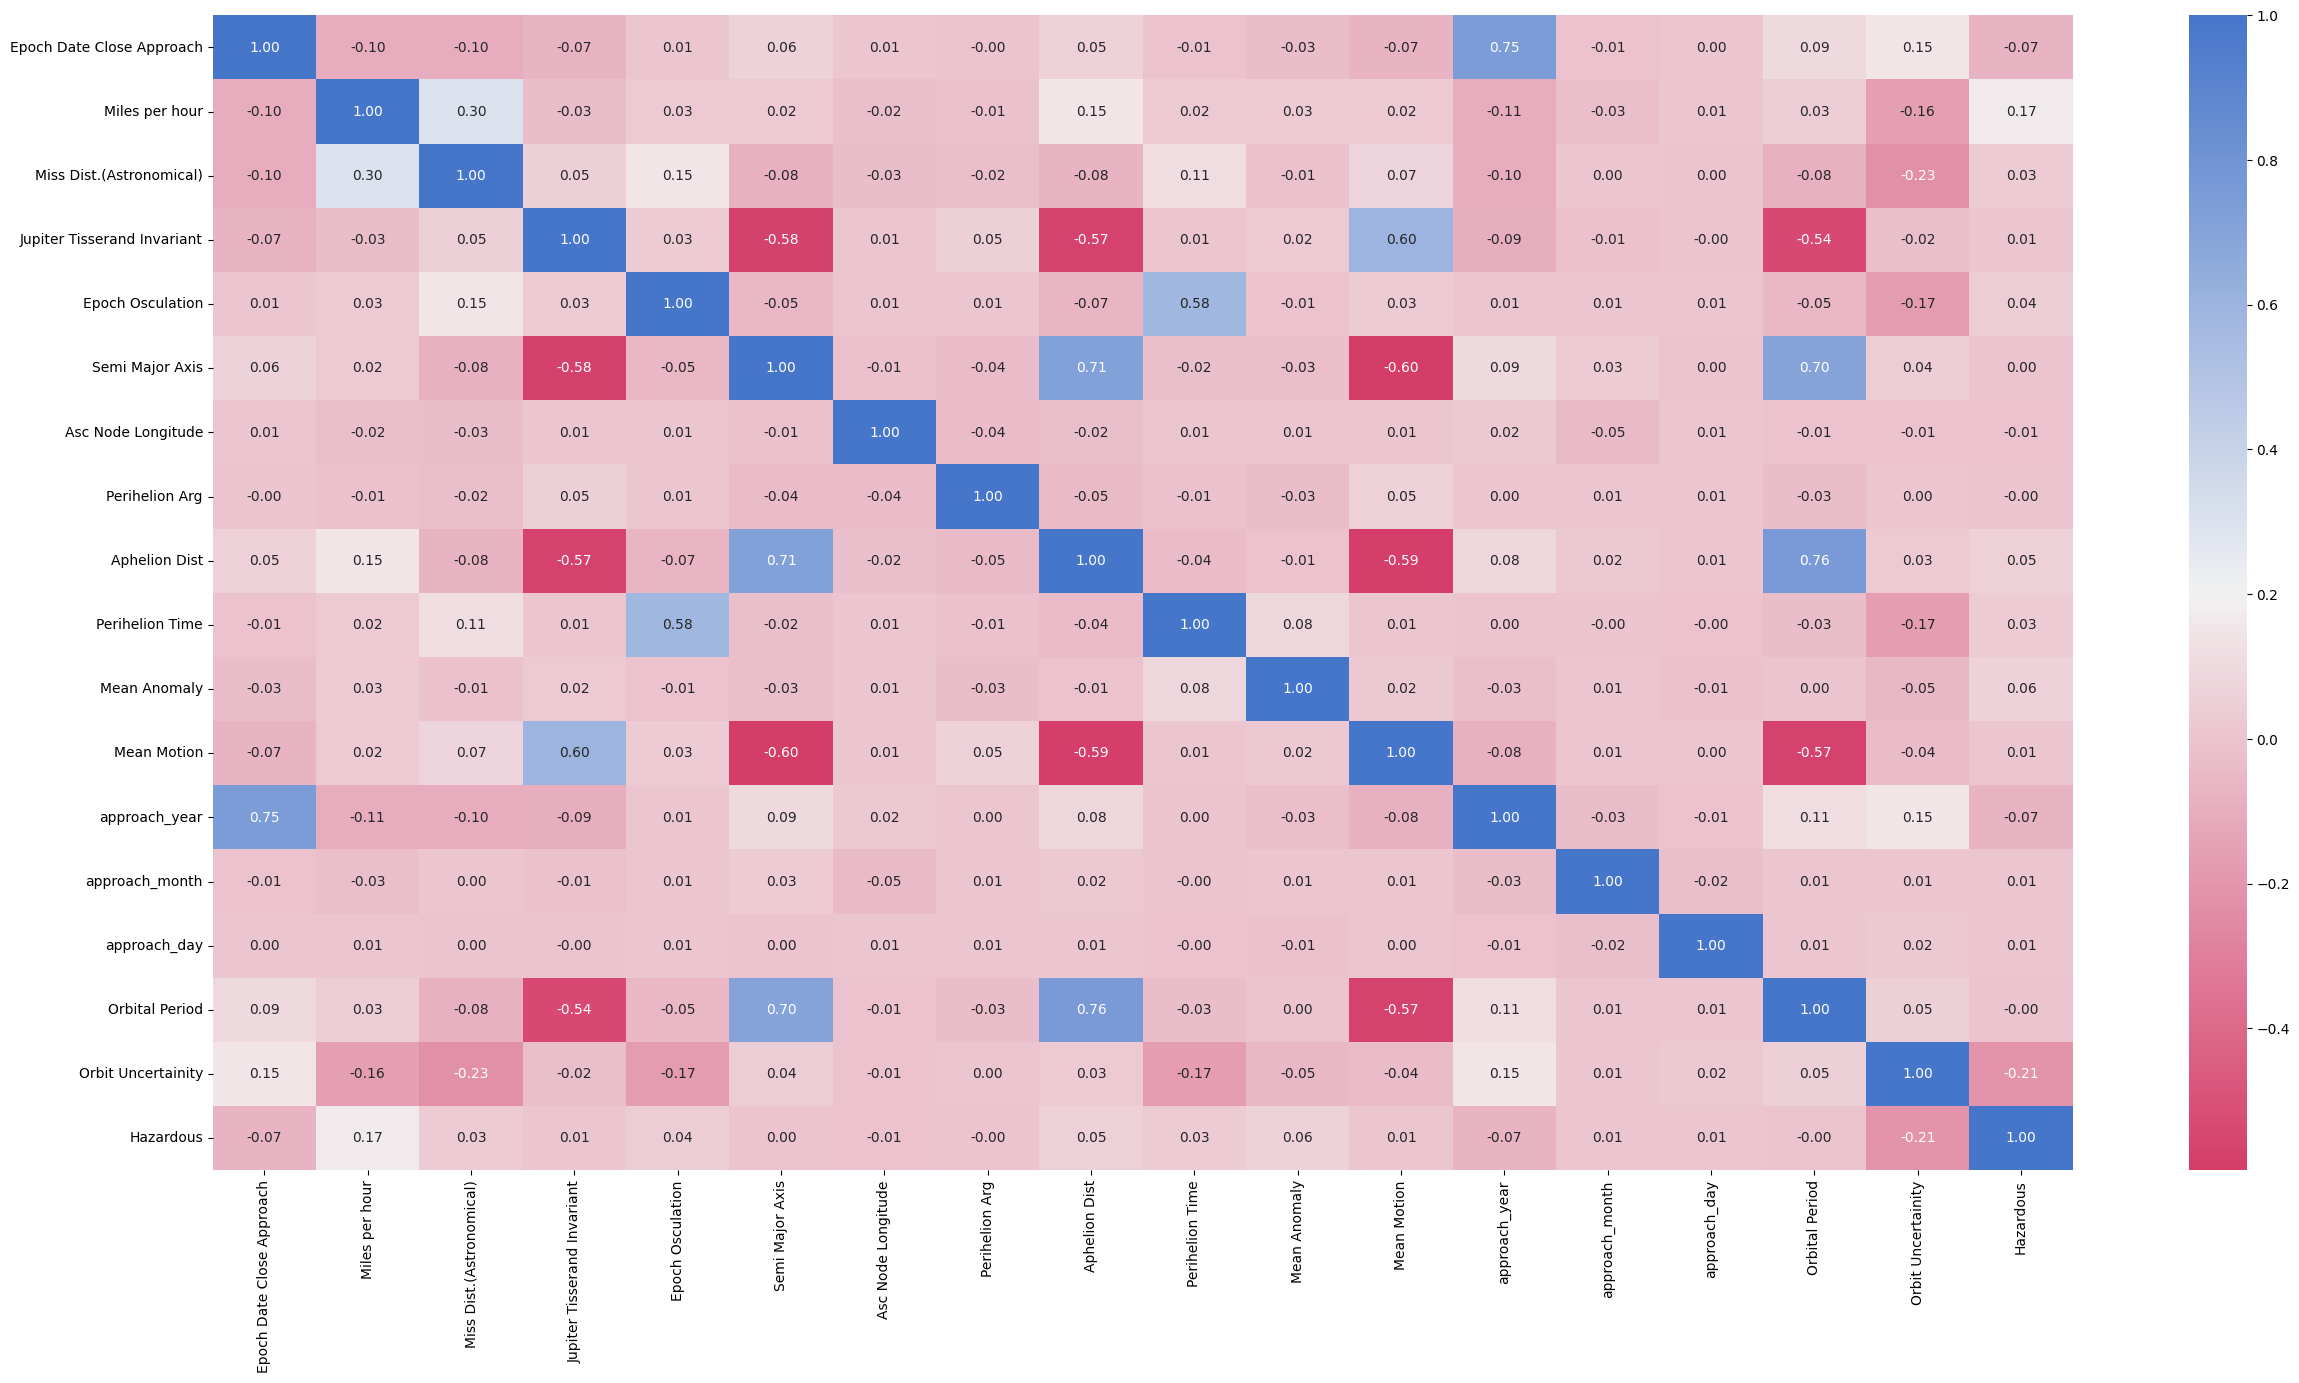

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlations for numeric columns
correlations = numeric_df.corr()

# Create heatmap
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(correlations, cmap=cmap, annot=True, fmt=".2f")  # Added annot=True to display values
plt.show()

FROM THE ABOVE CORRELATION MATRIX WE CAN CLEARLY OBSERVE THAT ORBIT UNCERTAINITY AND MILES PER HOUR ARE THE TWO MOST CORRELATED VARIALBE WITH WHETHER AN ASTEROID IS HAZARDOUS OR NOT

# PLOTS FOR ANALYSIS

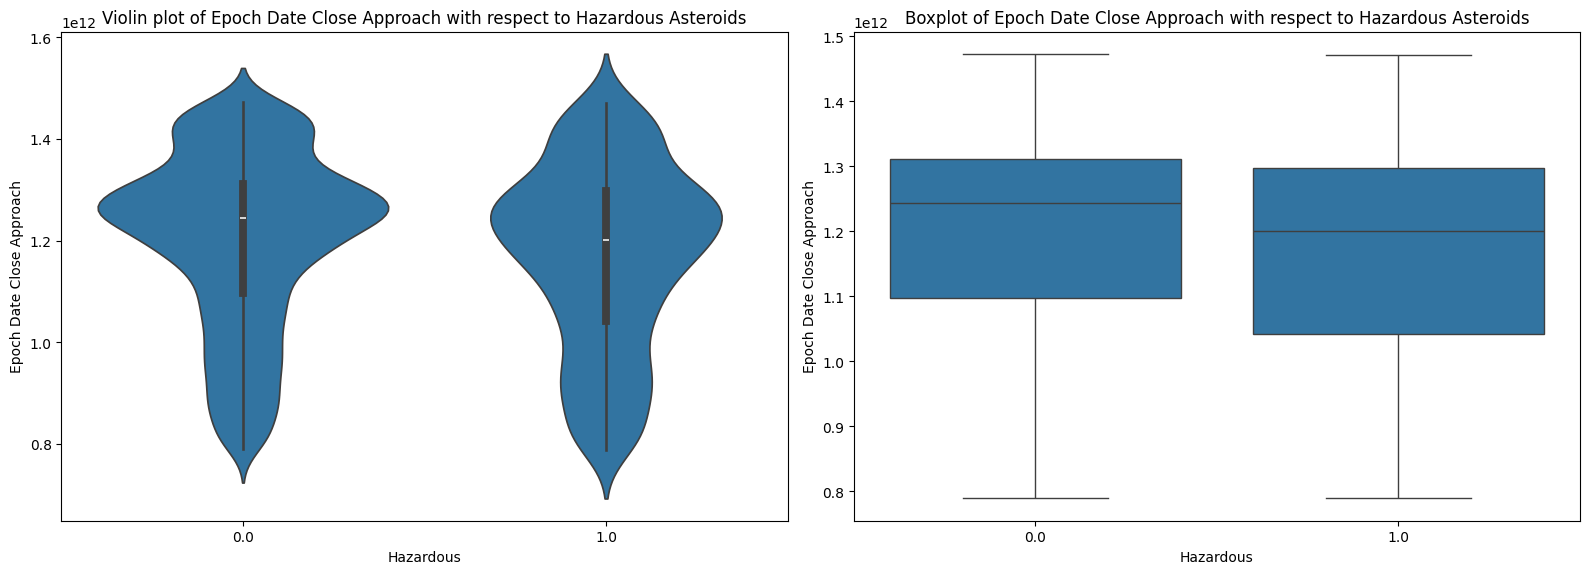

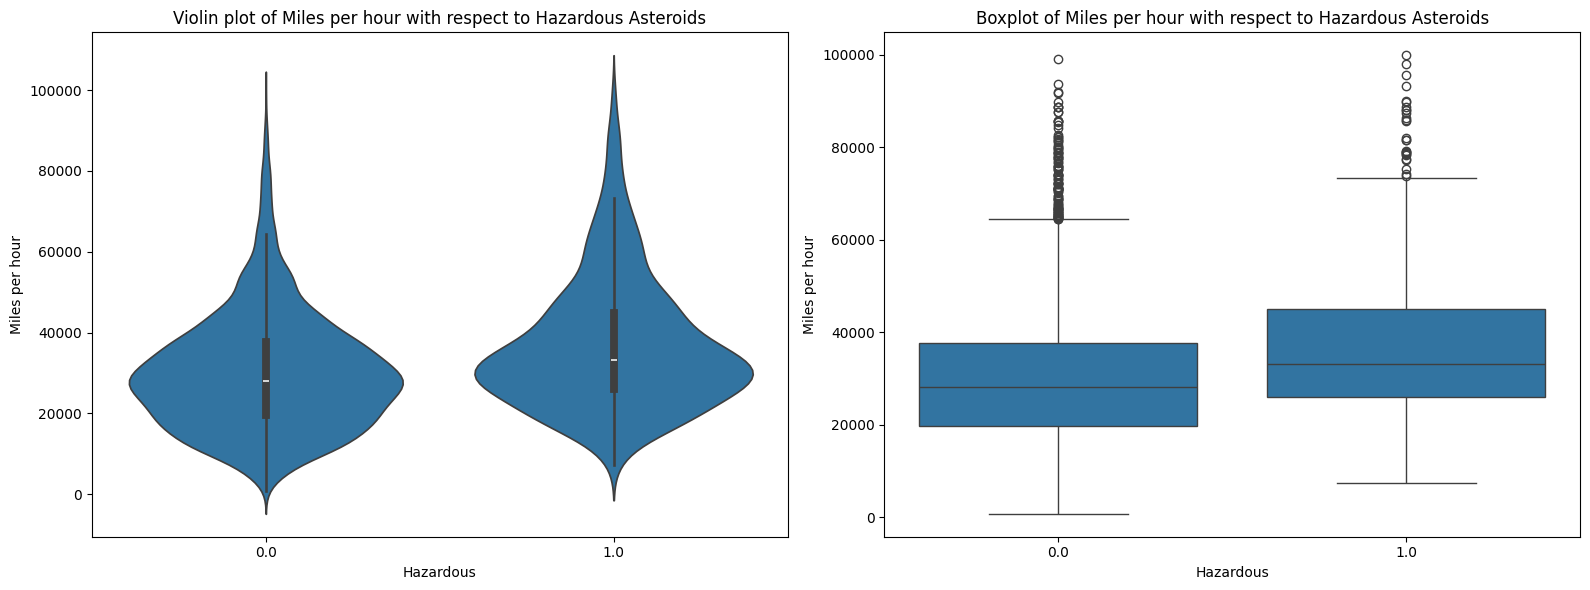

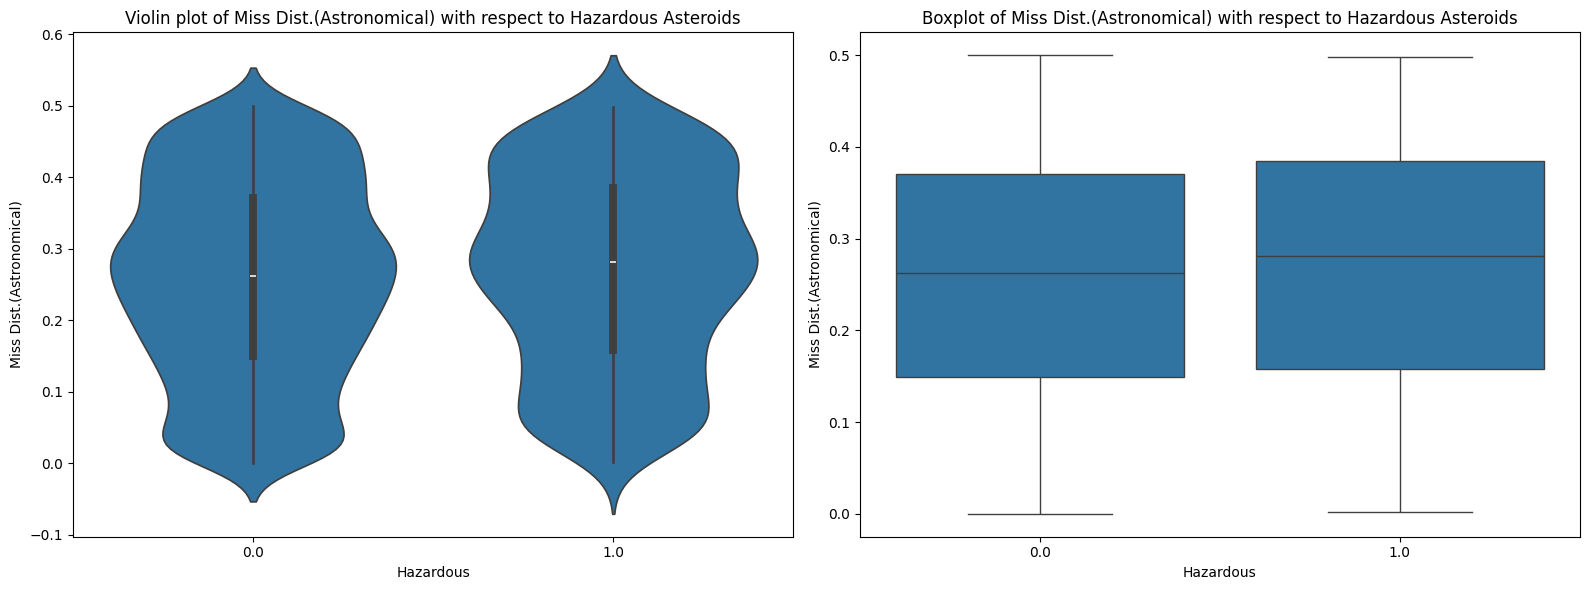

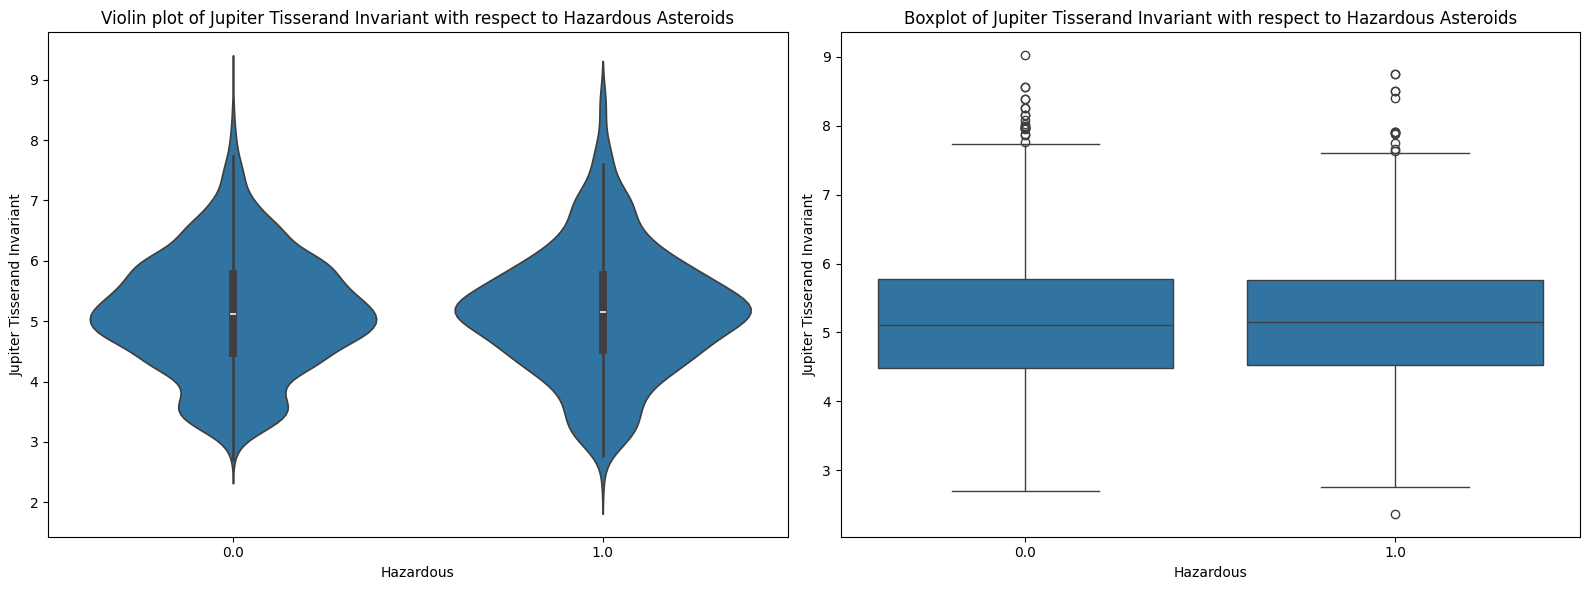

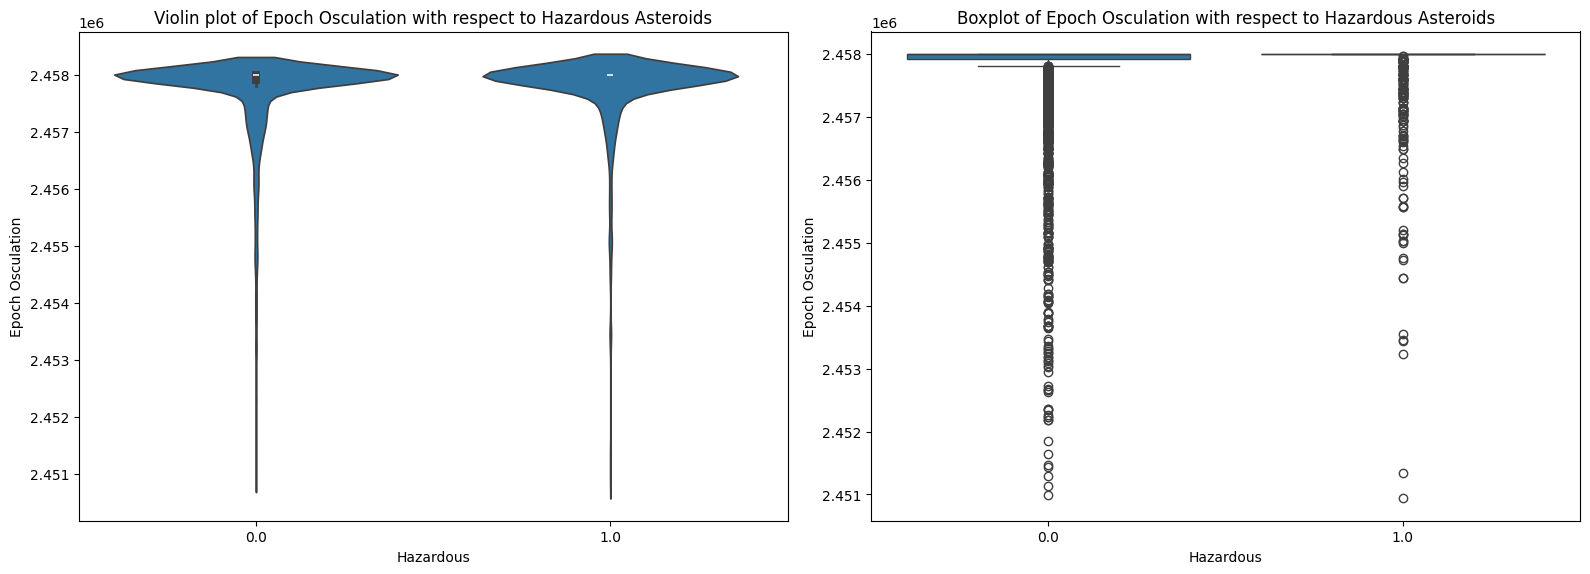

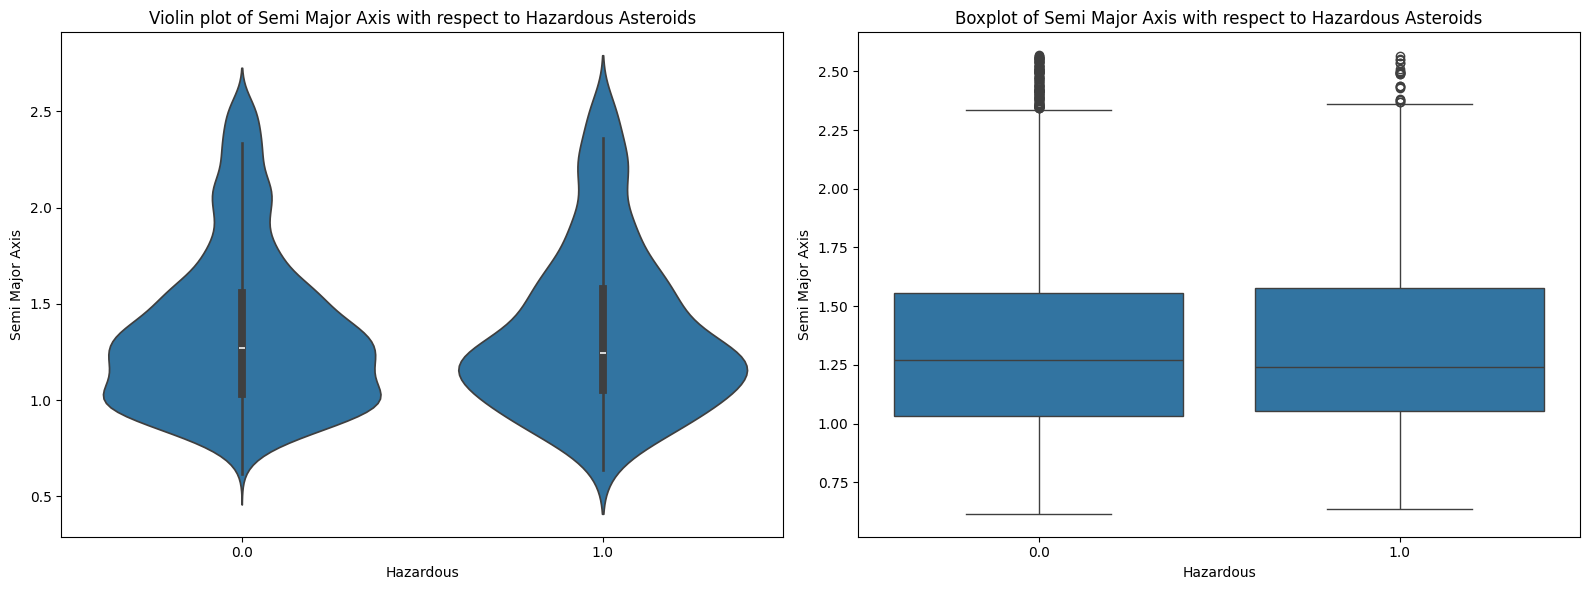

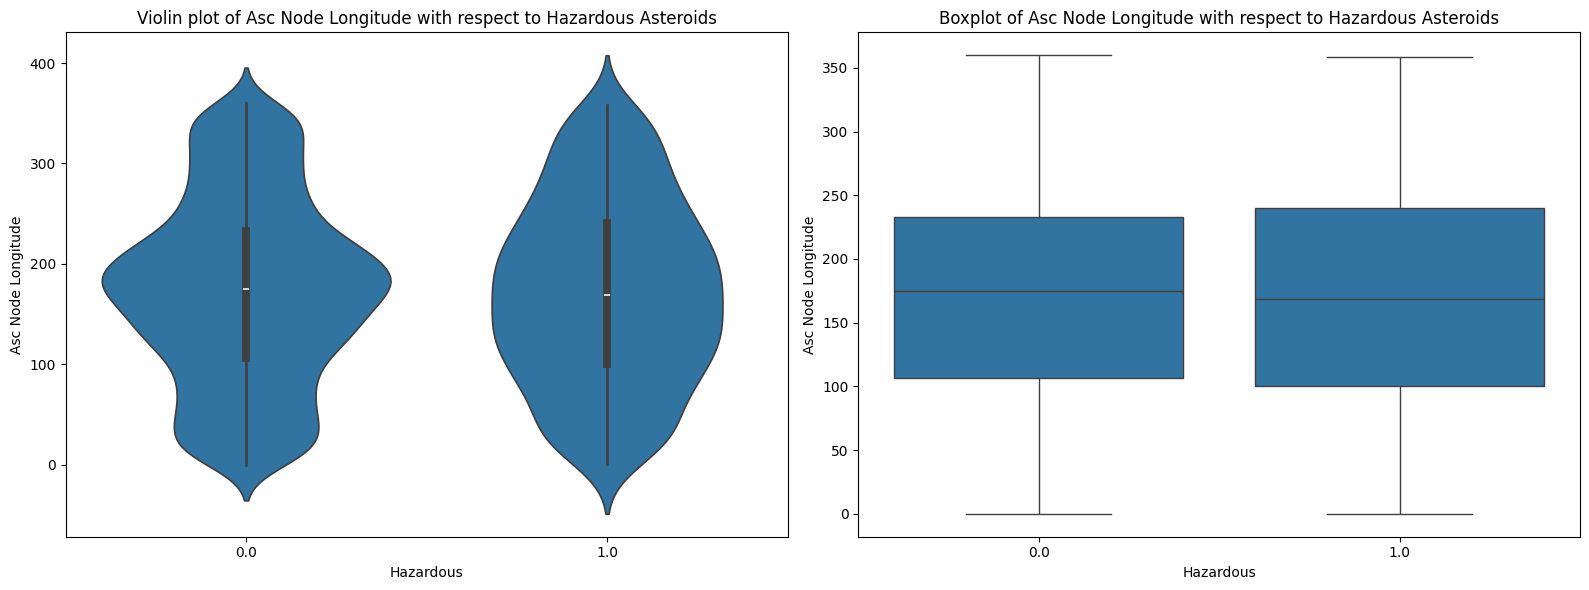

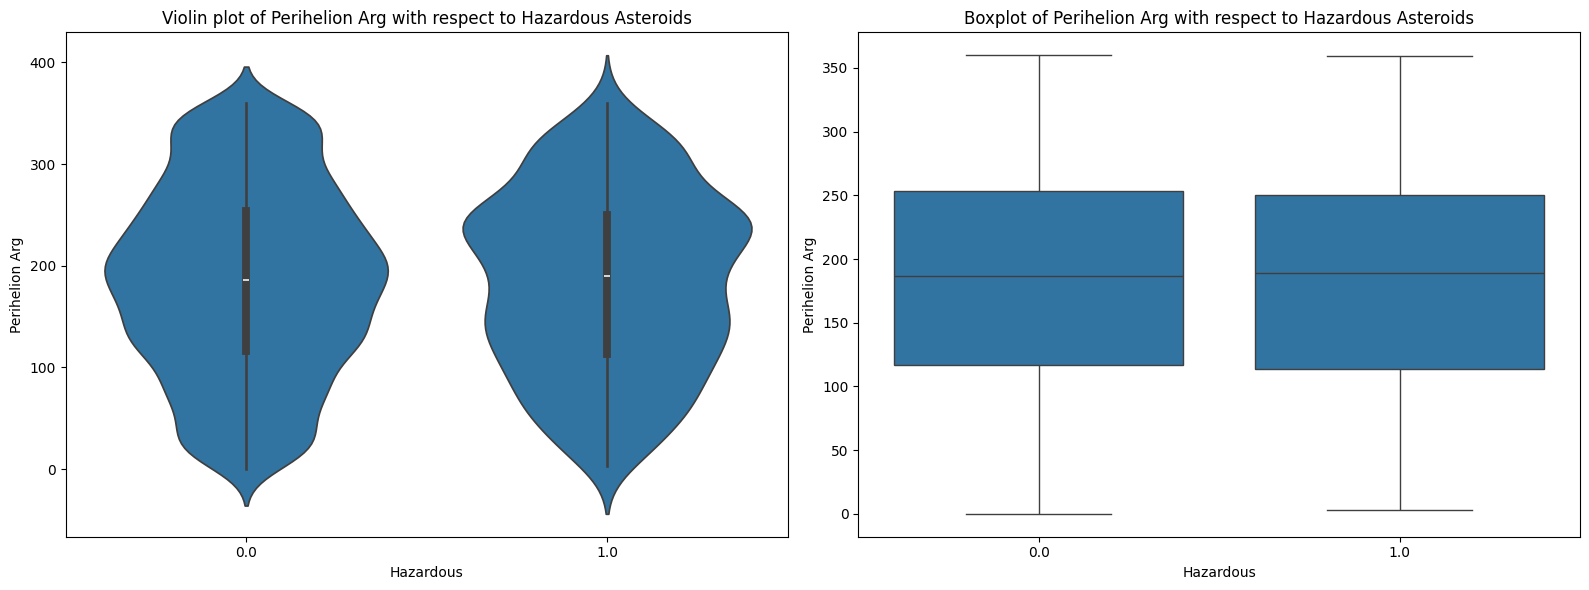

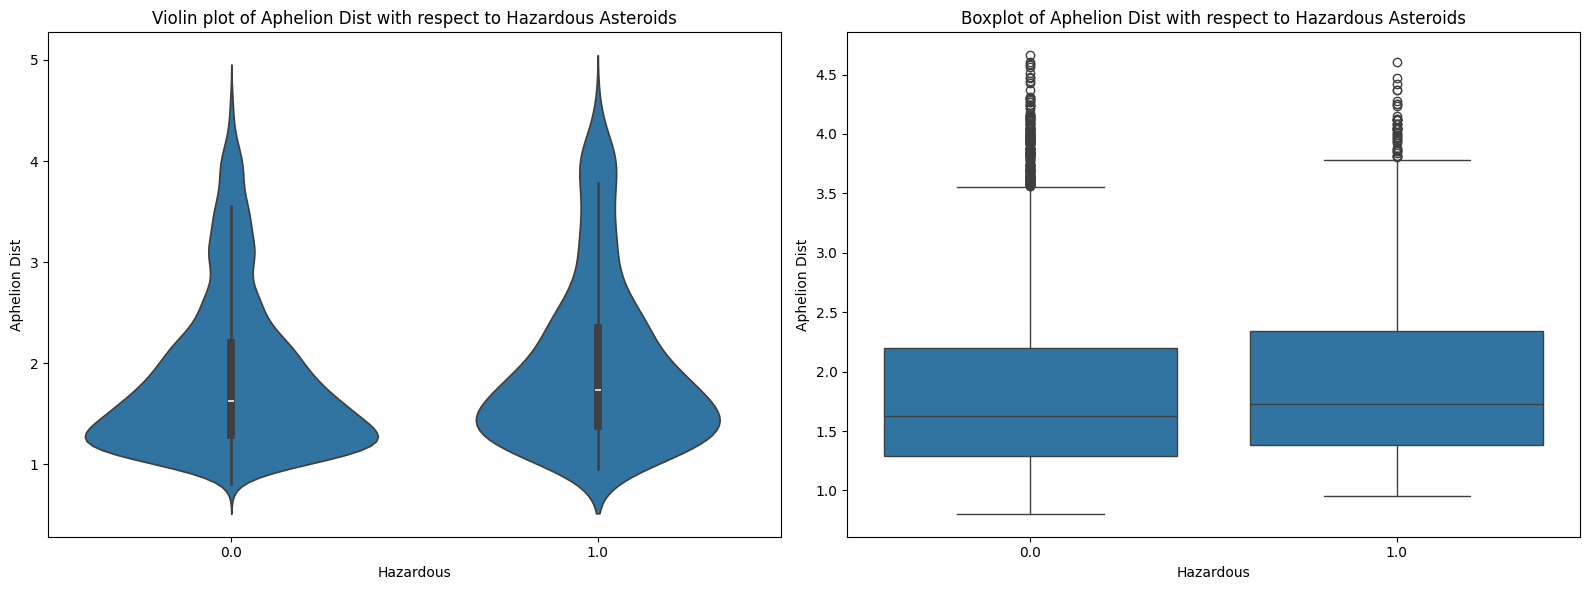

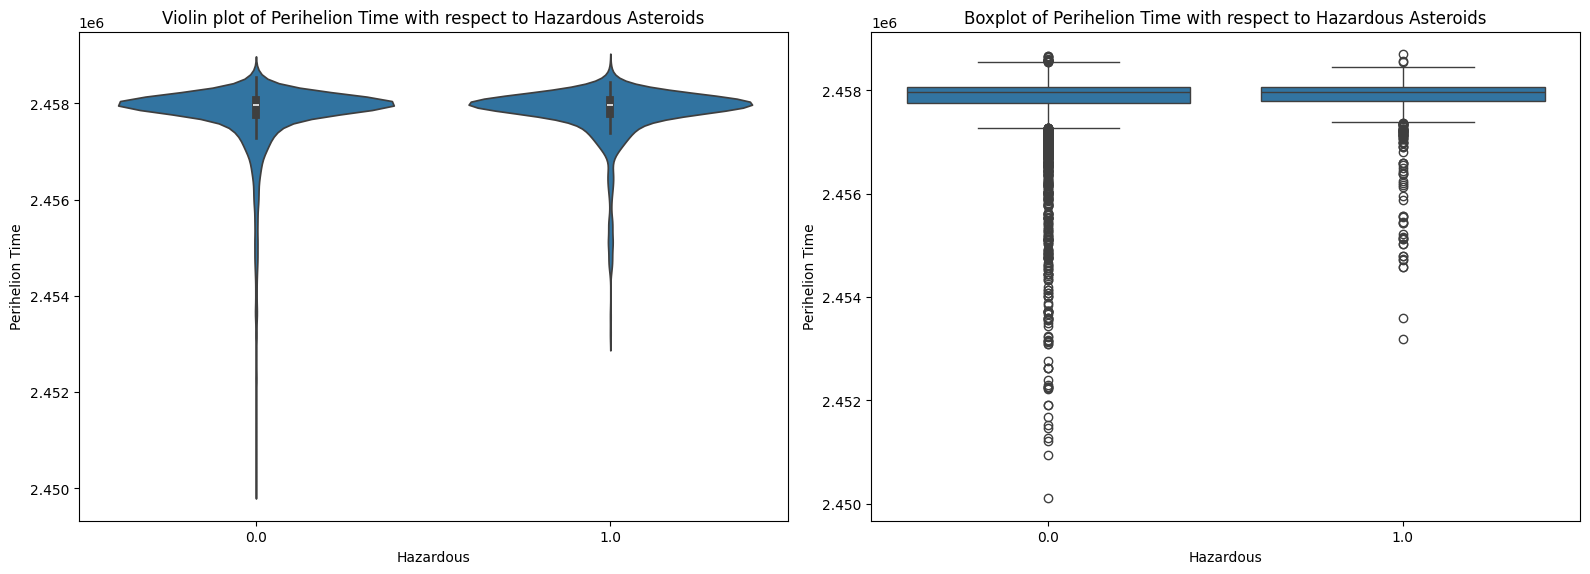

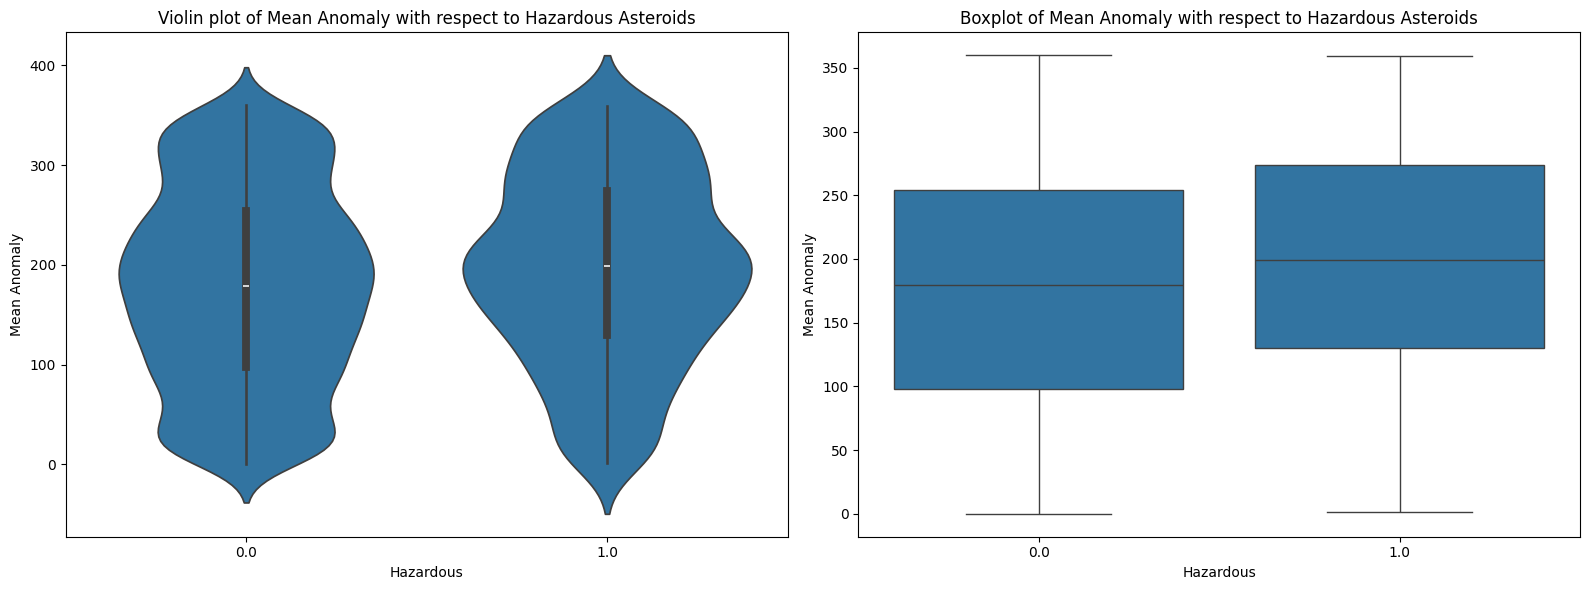

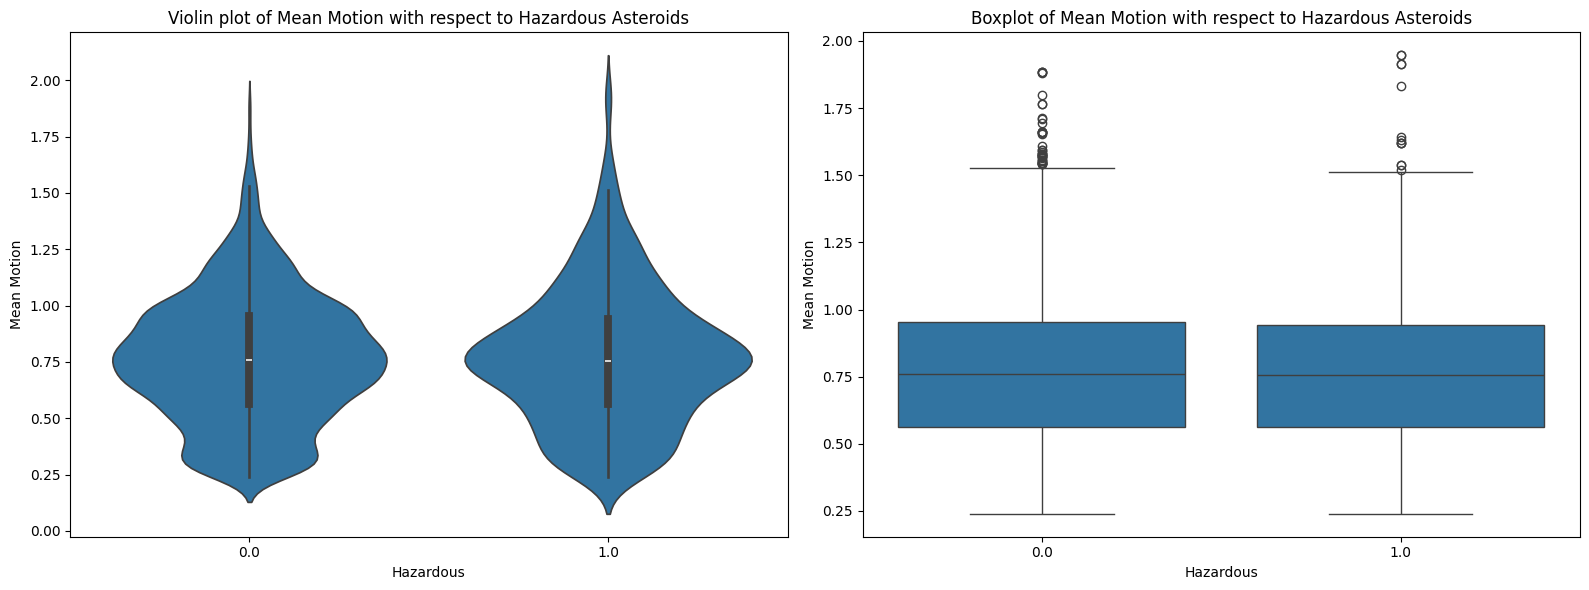

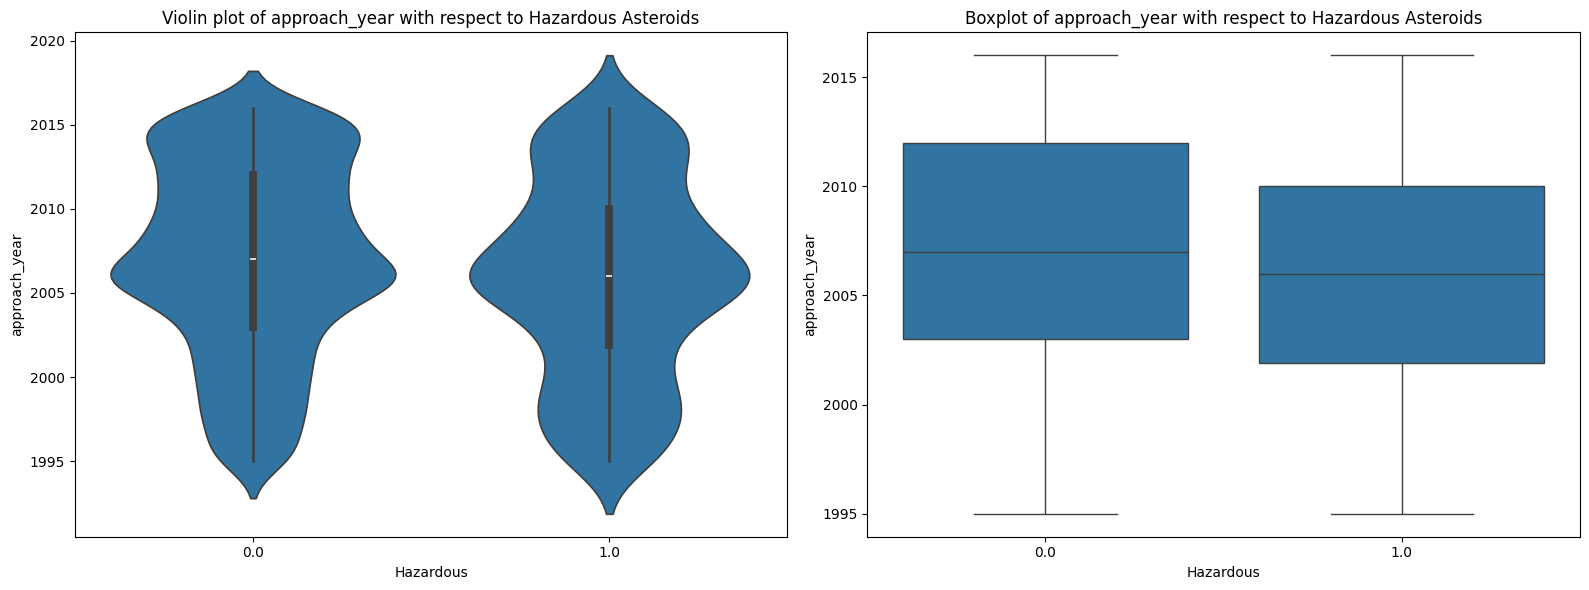

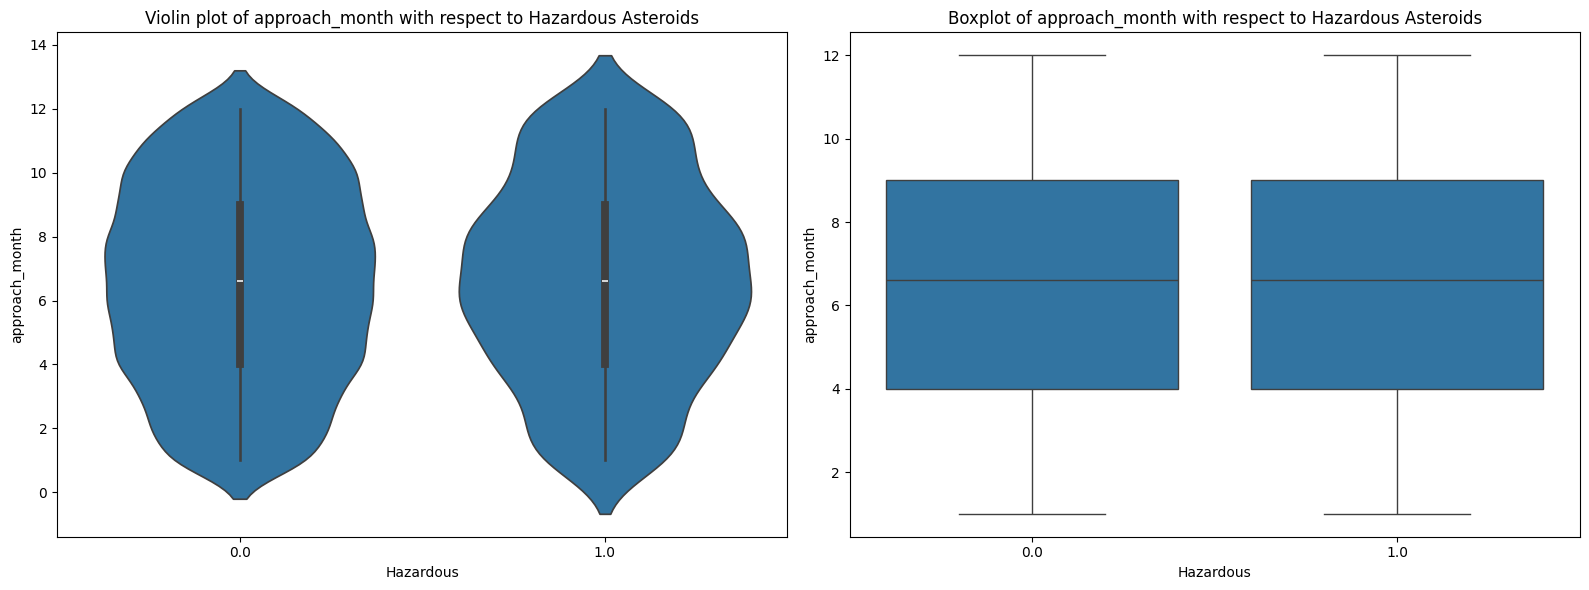

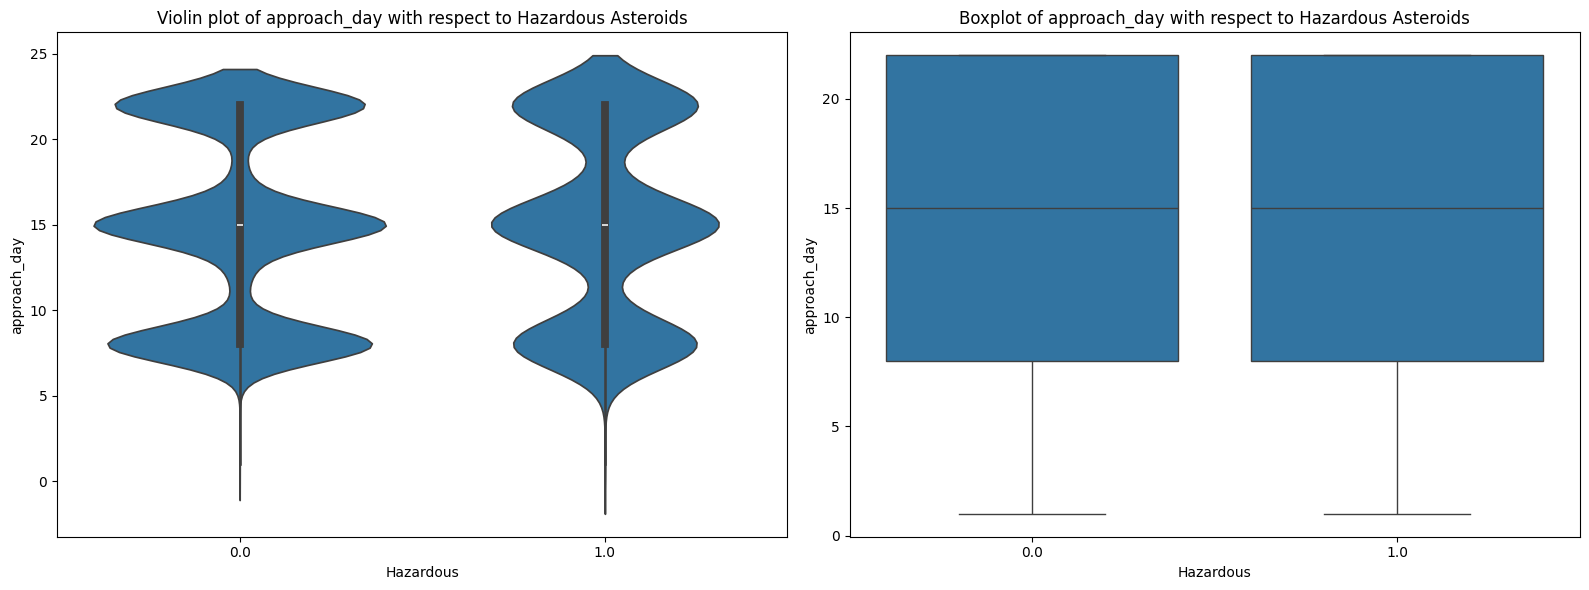

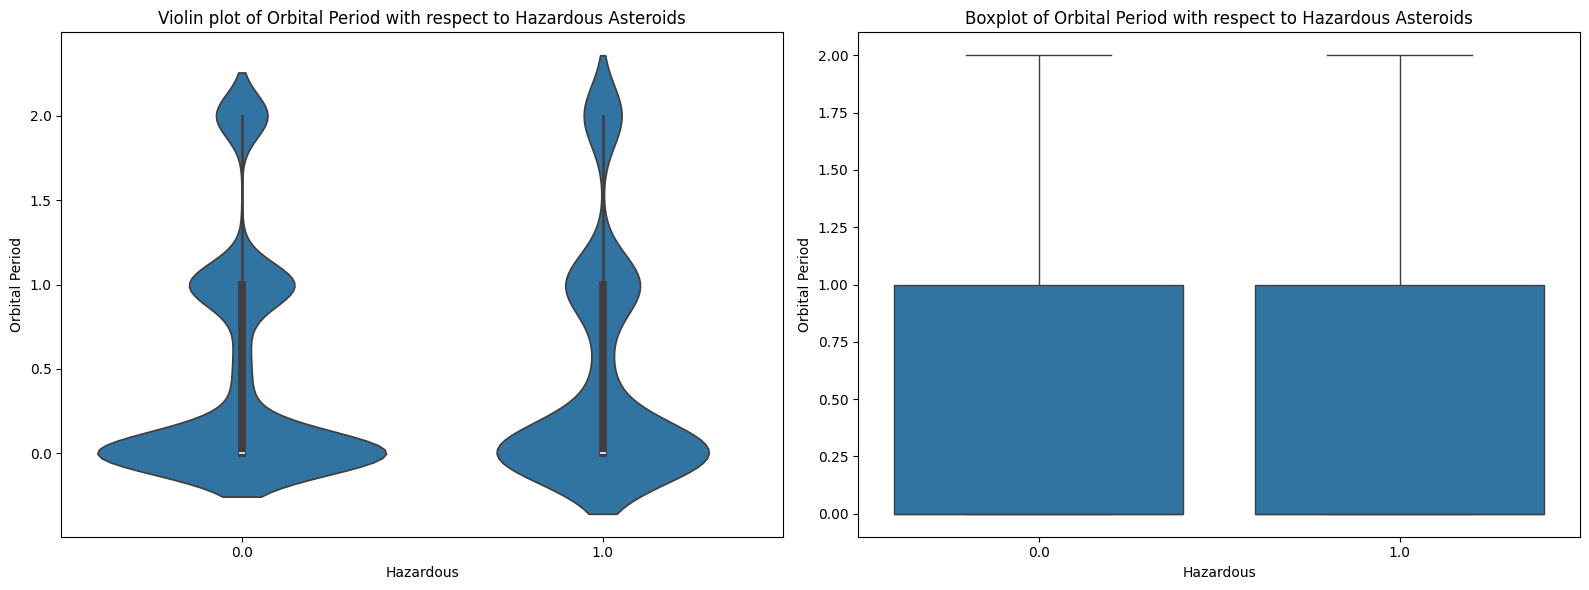

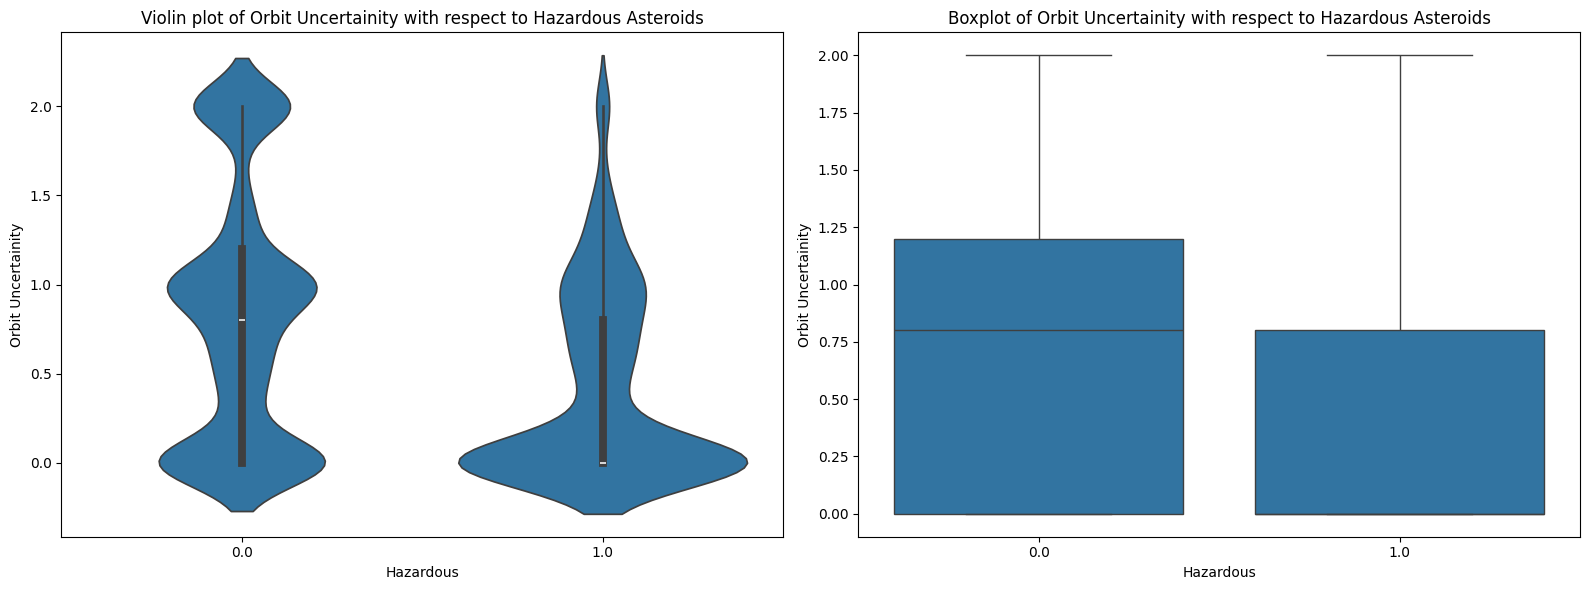

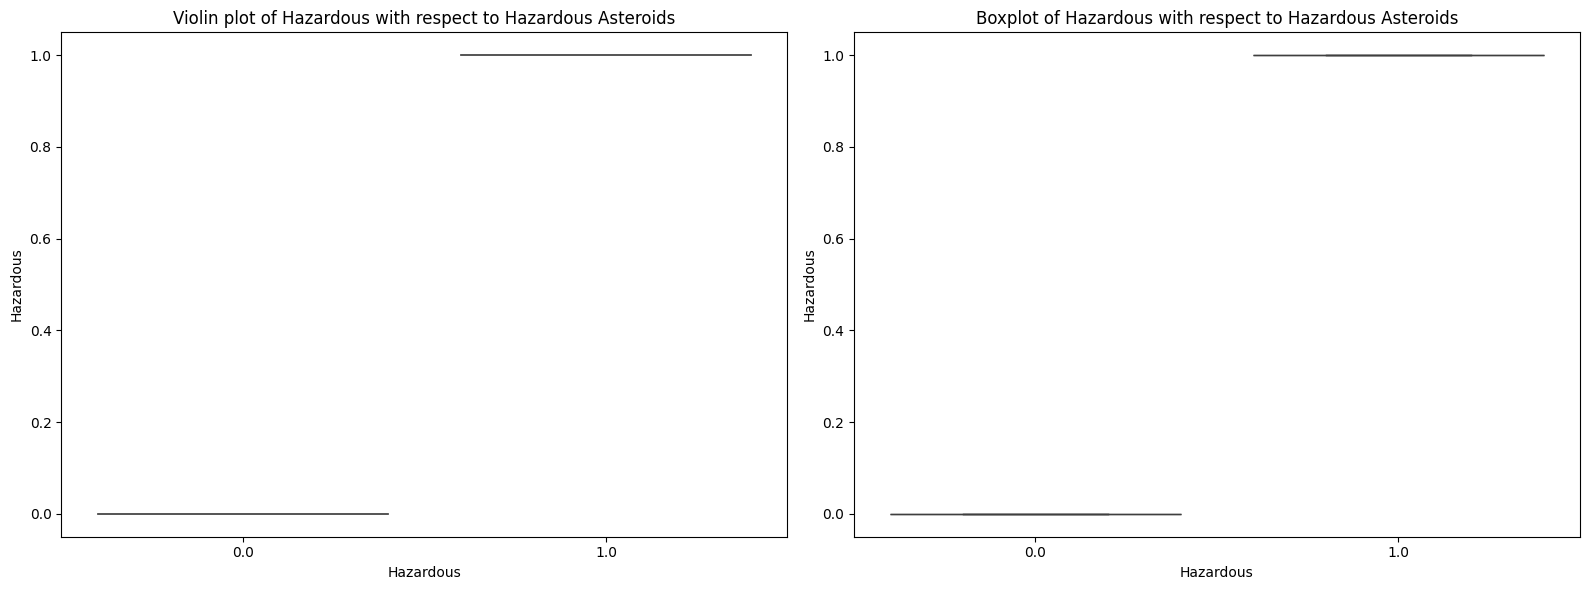

In [ ]:

# Step 1: Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Plot graphs of all numerical features with respect to 'Hazardous'
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create 1 row, 2 columns of subplots

    # Violin plot for the current feature with respect to 'Hazardous'
    sns.violinplot(x='Hazardous', y=feature, data=df, ax=axes[0])
    axes[0].set_title(f"Violin plot of {feature} with respect to Hazardous Asteroids")

    # Boxplot for the current feature with respect to 'Hazardous'
    sns.boxplot(x='Hazardous', y=feature, data=df, ax=axes[1])
    axes[1].set_title(f"Boxplot of {feature} with respect to Hazardous Asteroids")

    # Show the plots
    plt.tight_layout()
    plt.show()



AS WE CAN SEE MILES PER HOUR, EPOCH OSCULATION, APHELION DIST, PERHELION TIME AND MEAN MOTION HAVE SOME DATA OUTLIERS

# TREATING OUTLIERS WITH FLOORING AND CAPING METHOD

In [ ]:
def treat_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
    return df


In [ ]:

col_list = ['Miles per hour', 'Aphelion Dist', 'Perihelion Time', 'Mean Motion','Semi Major Axis']  # Replace with your column names
df = treat_outliers_all(df, col_list)

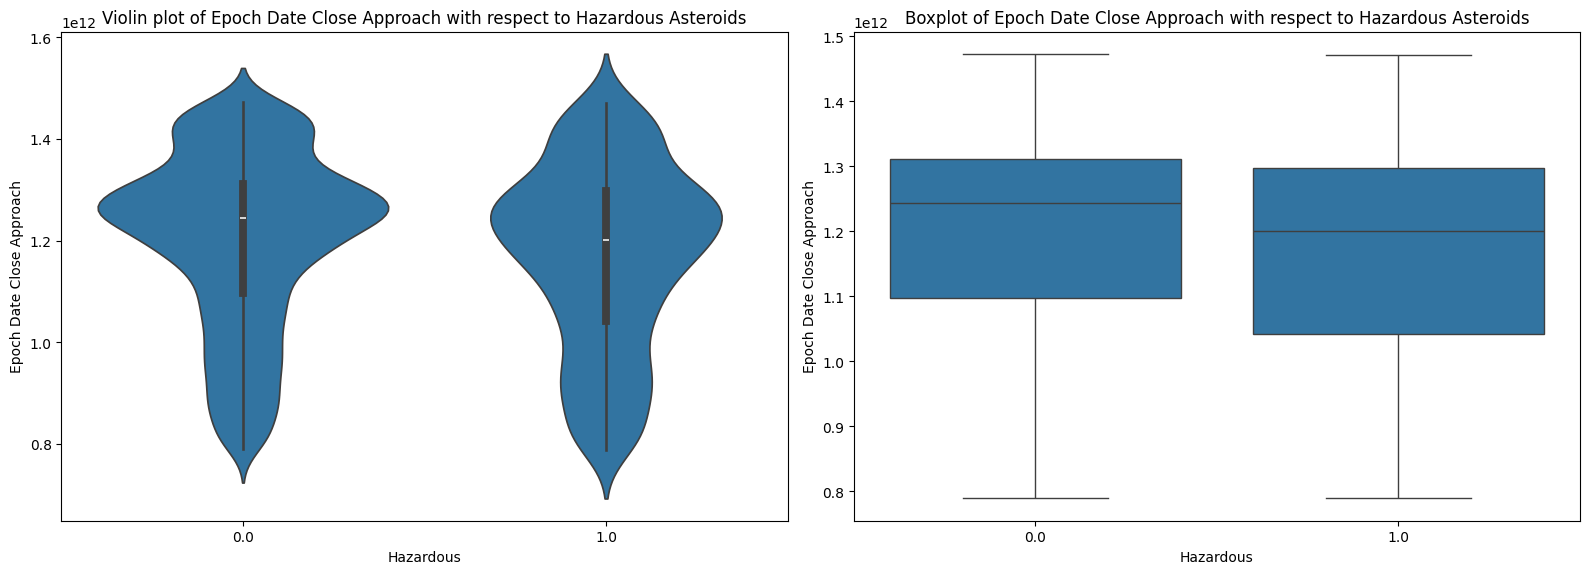

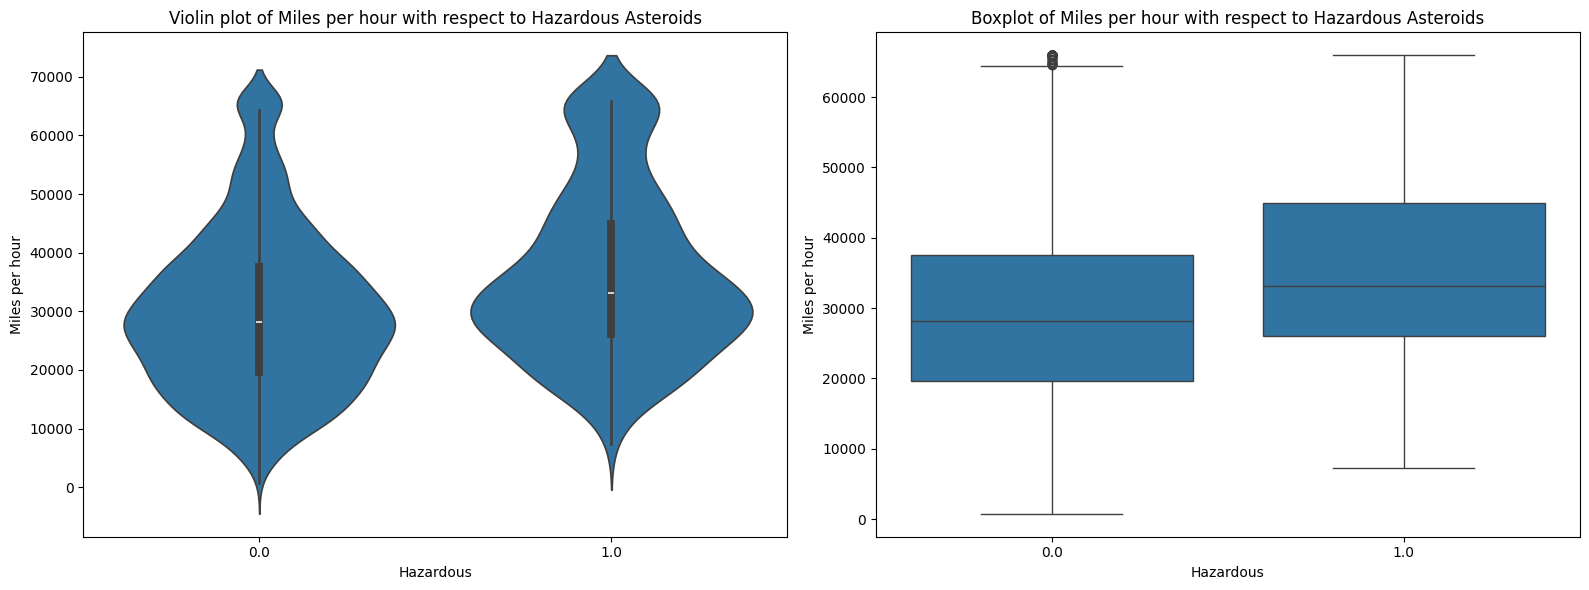

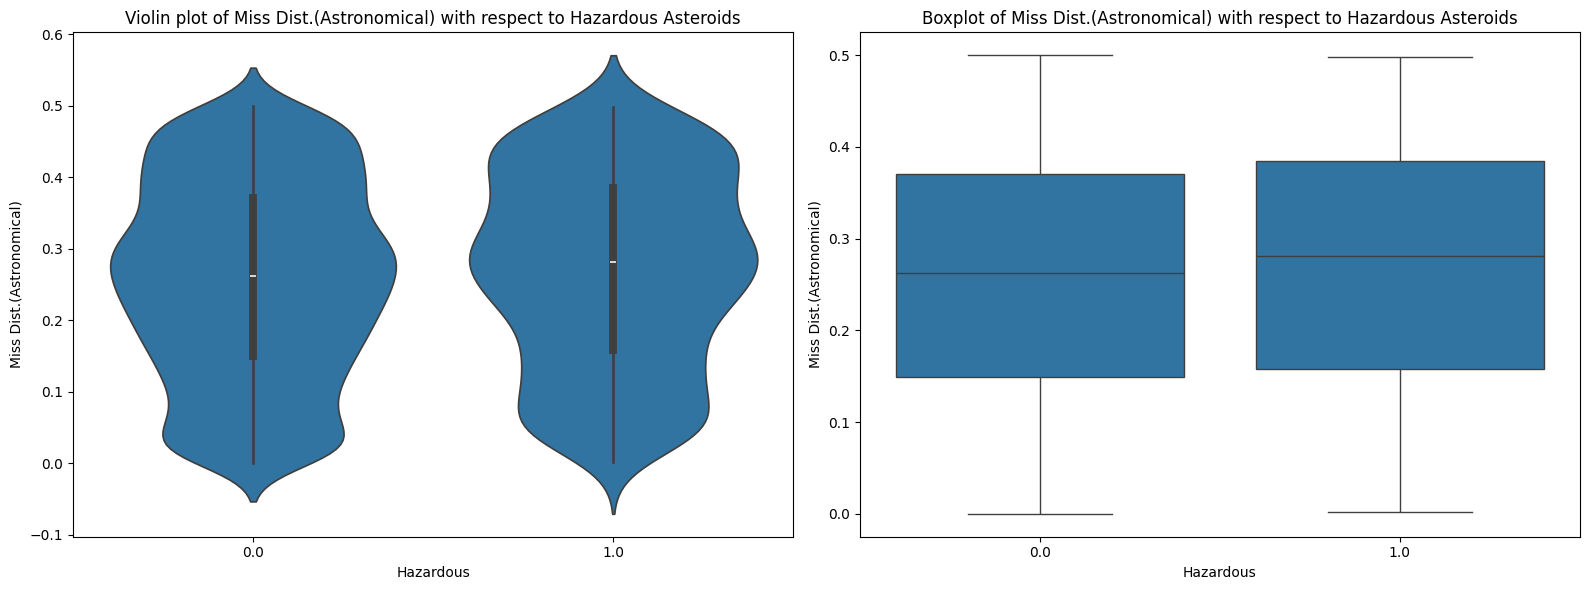

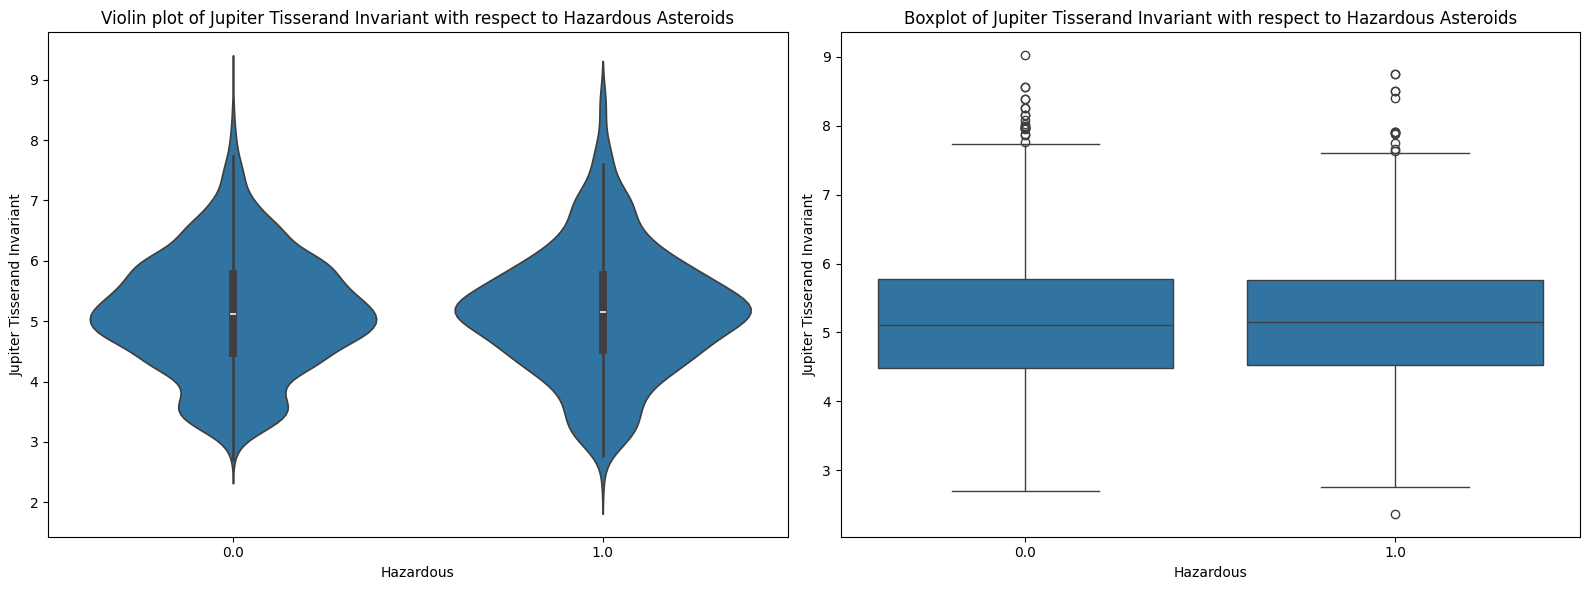

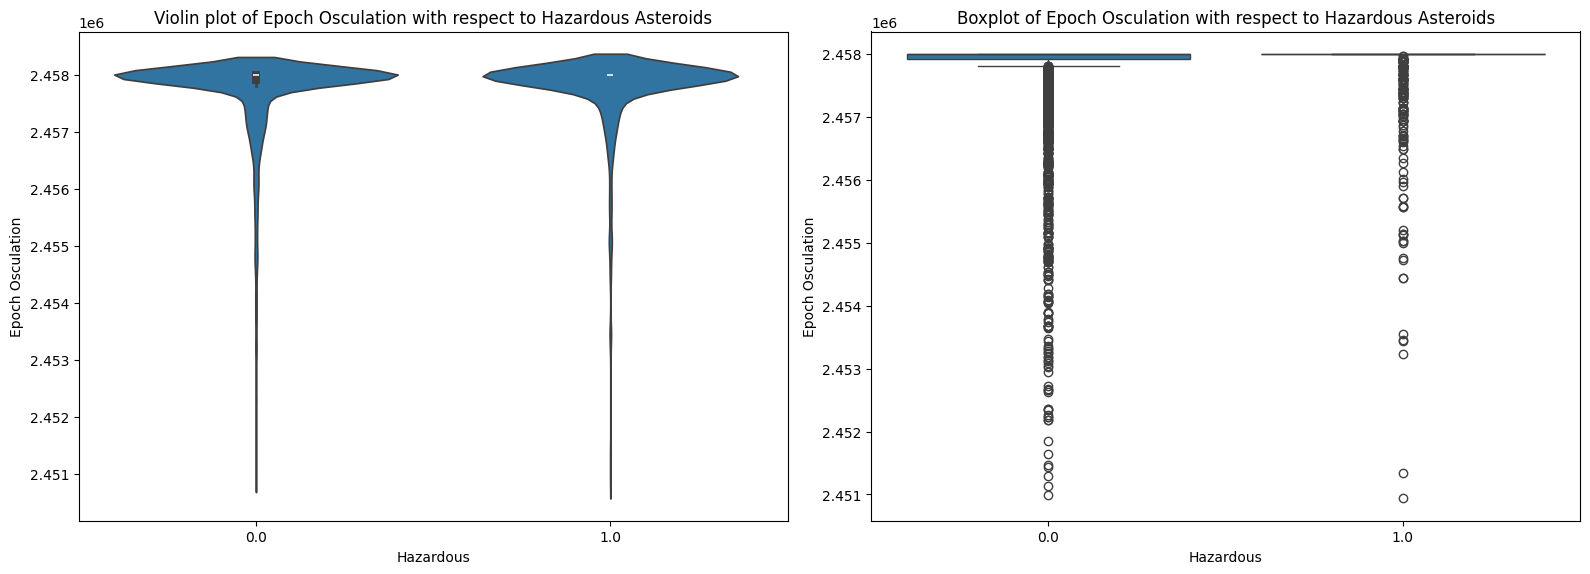

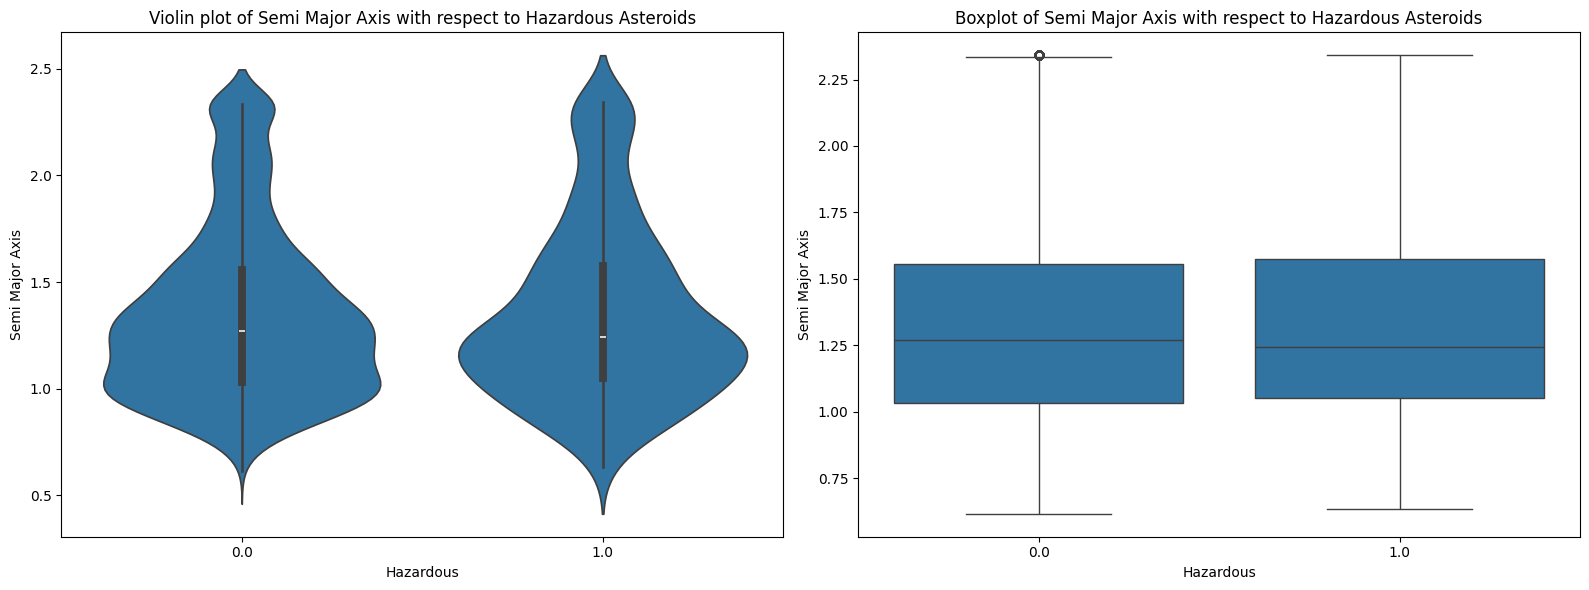

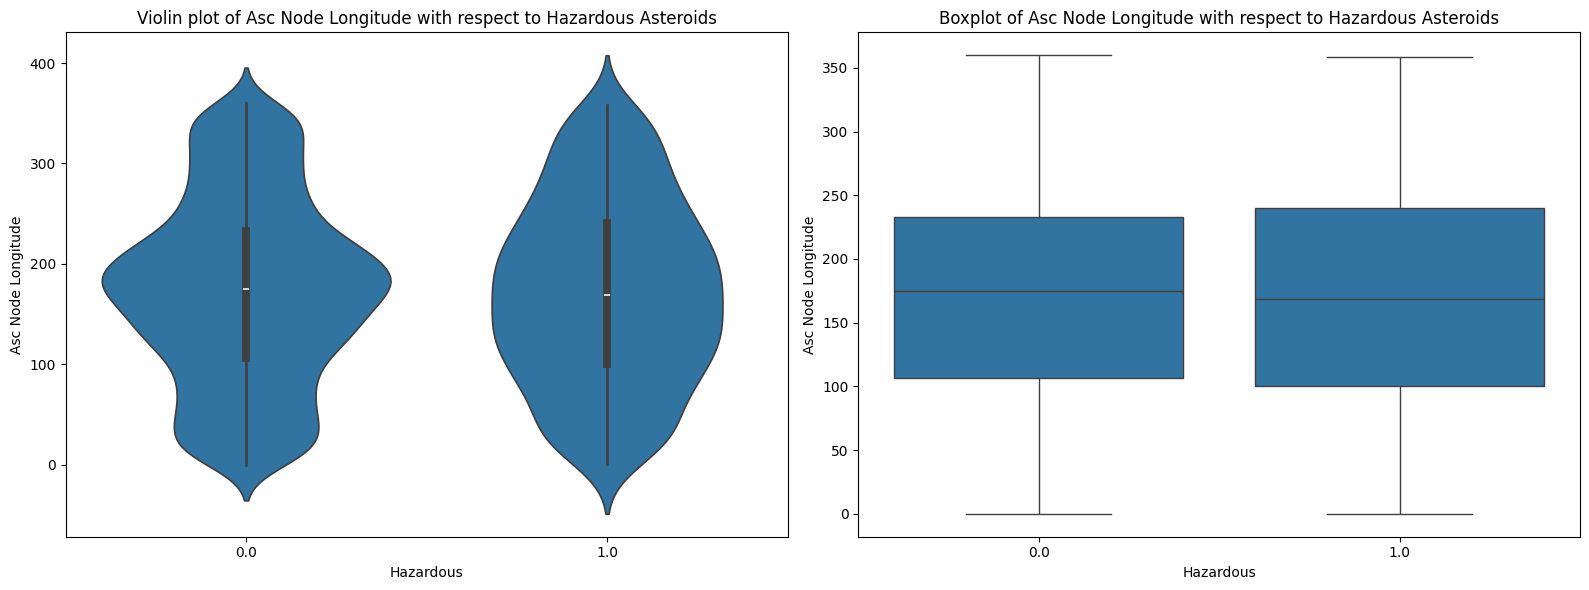

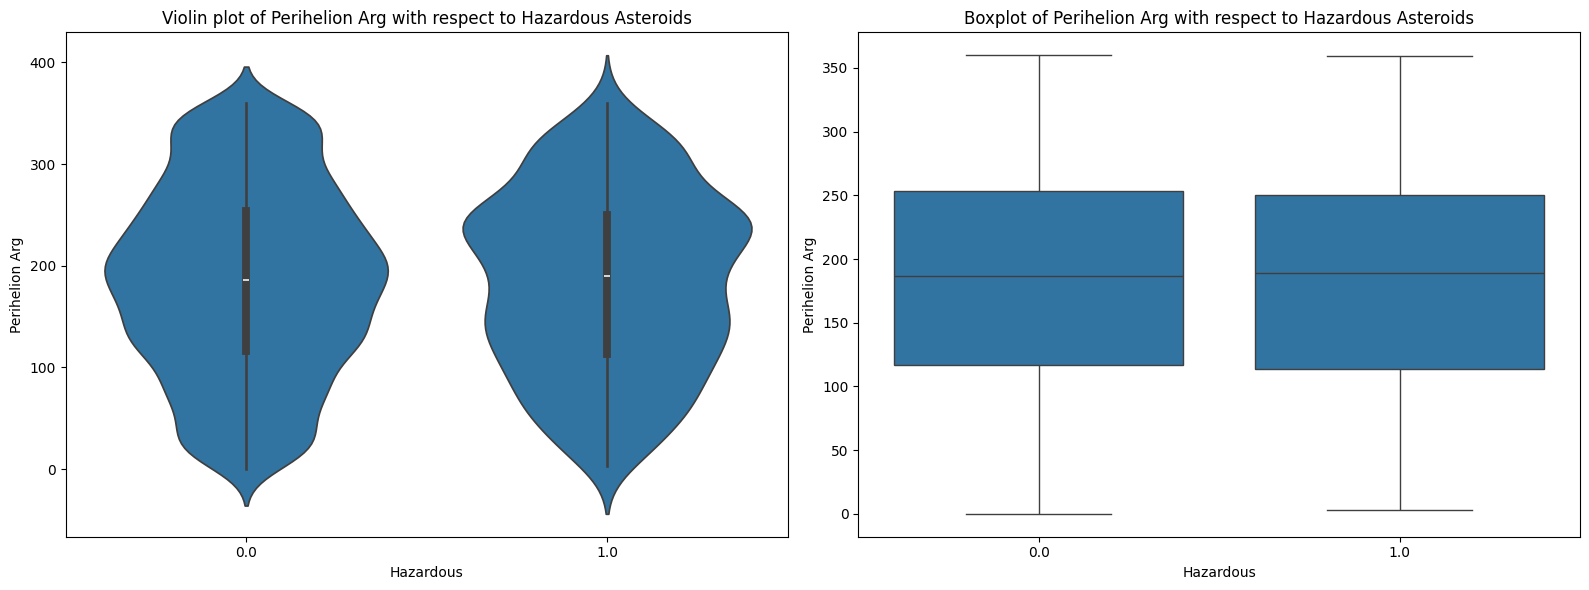

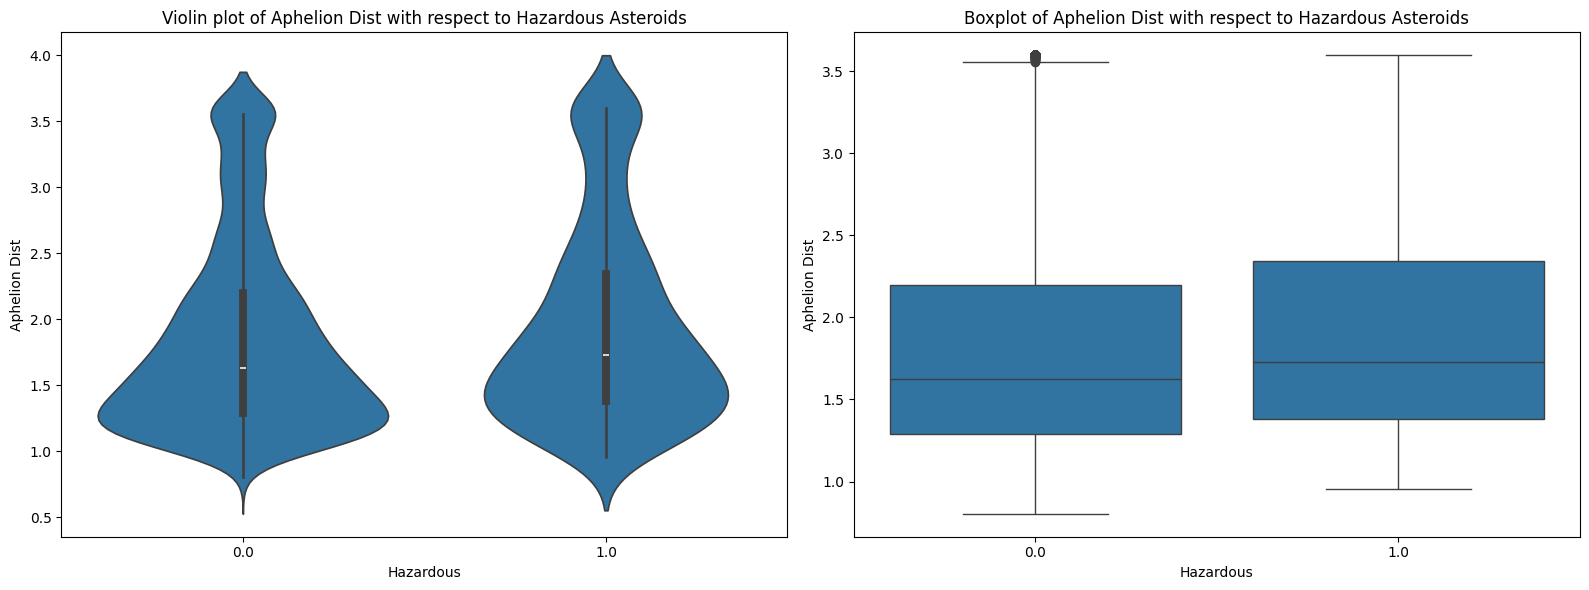

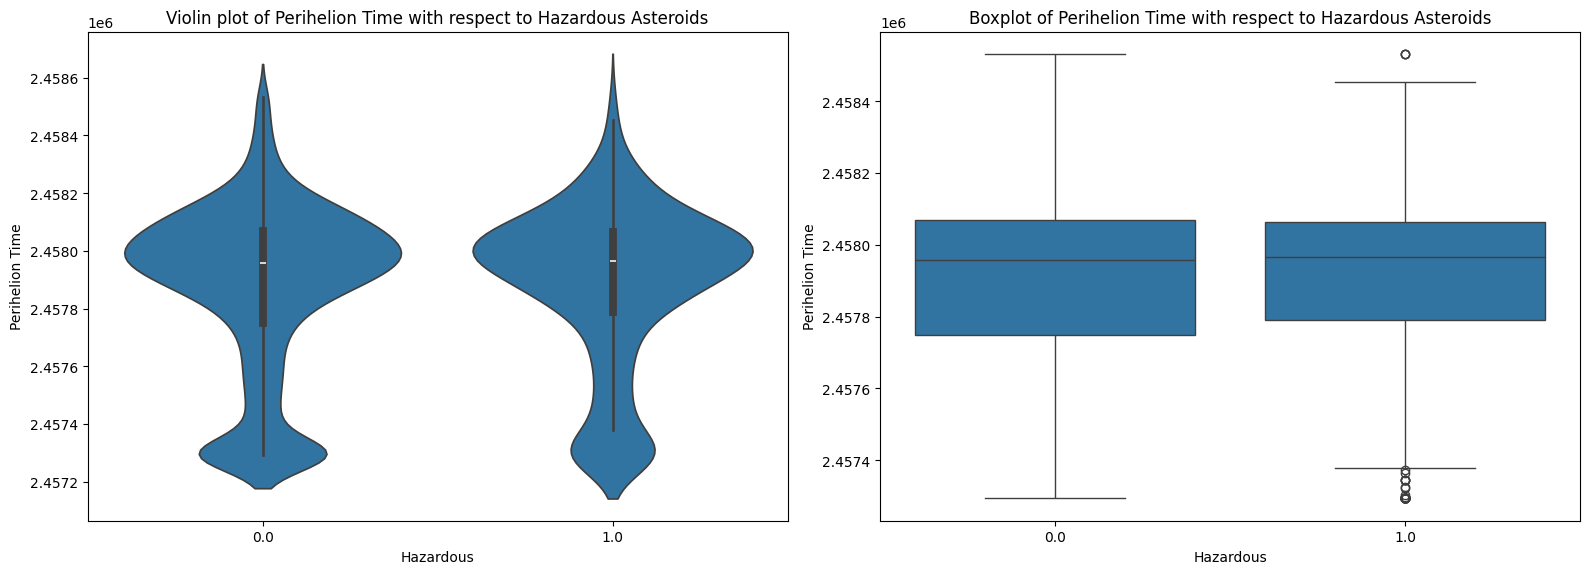

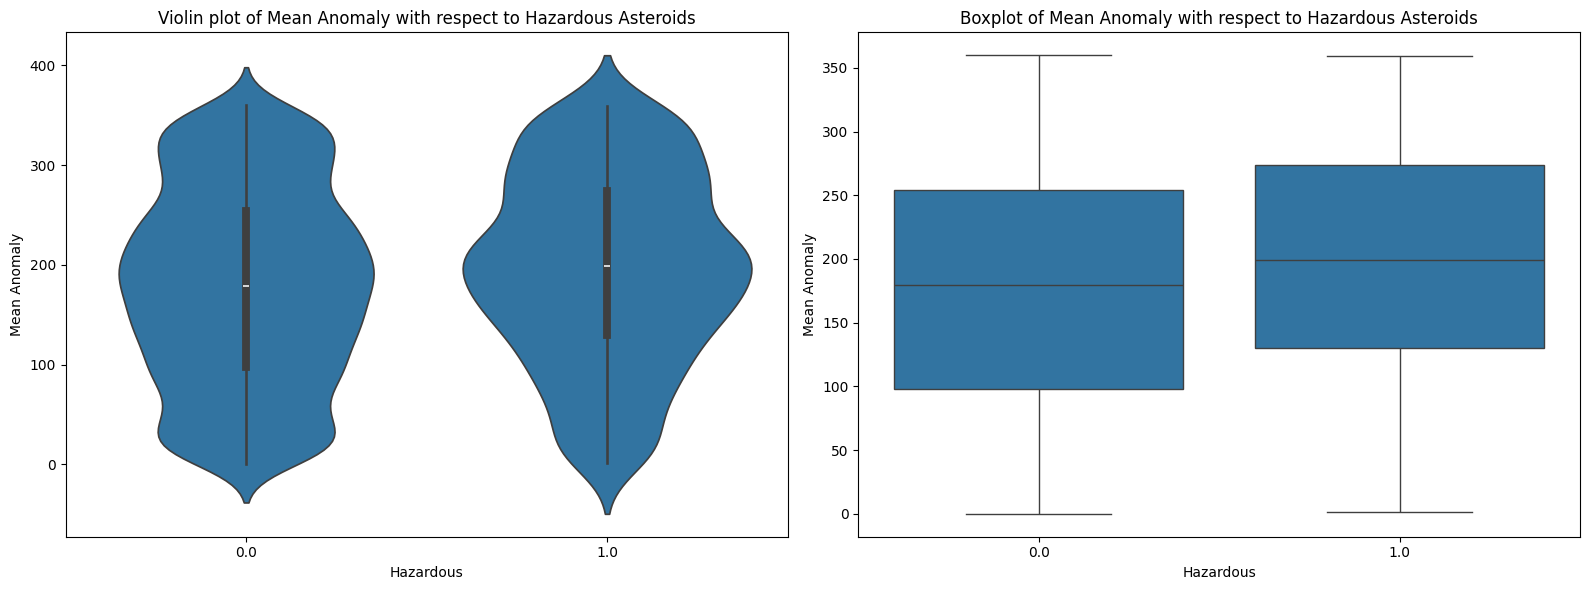

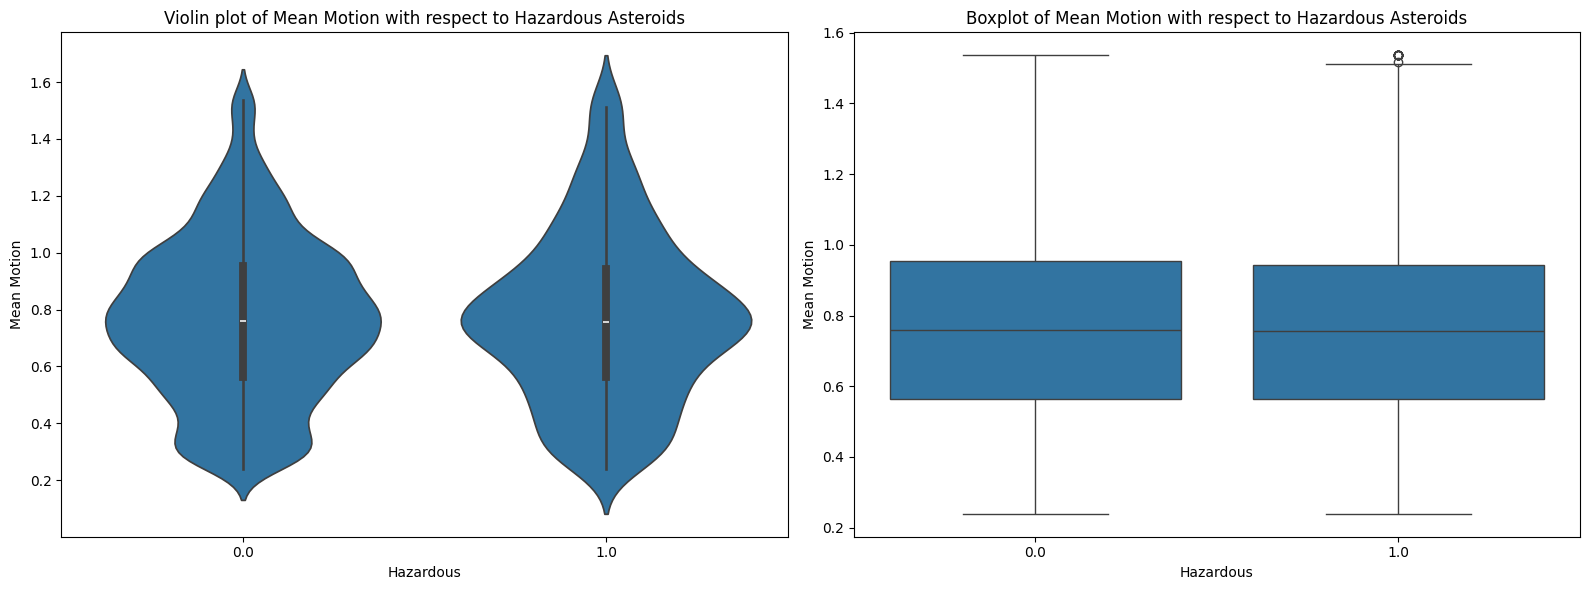

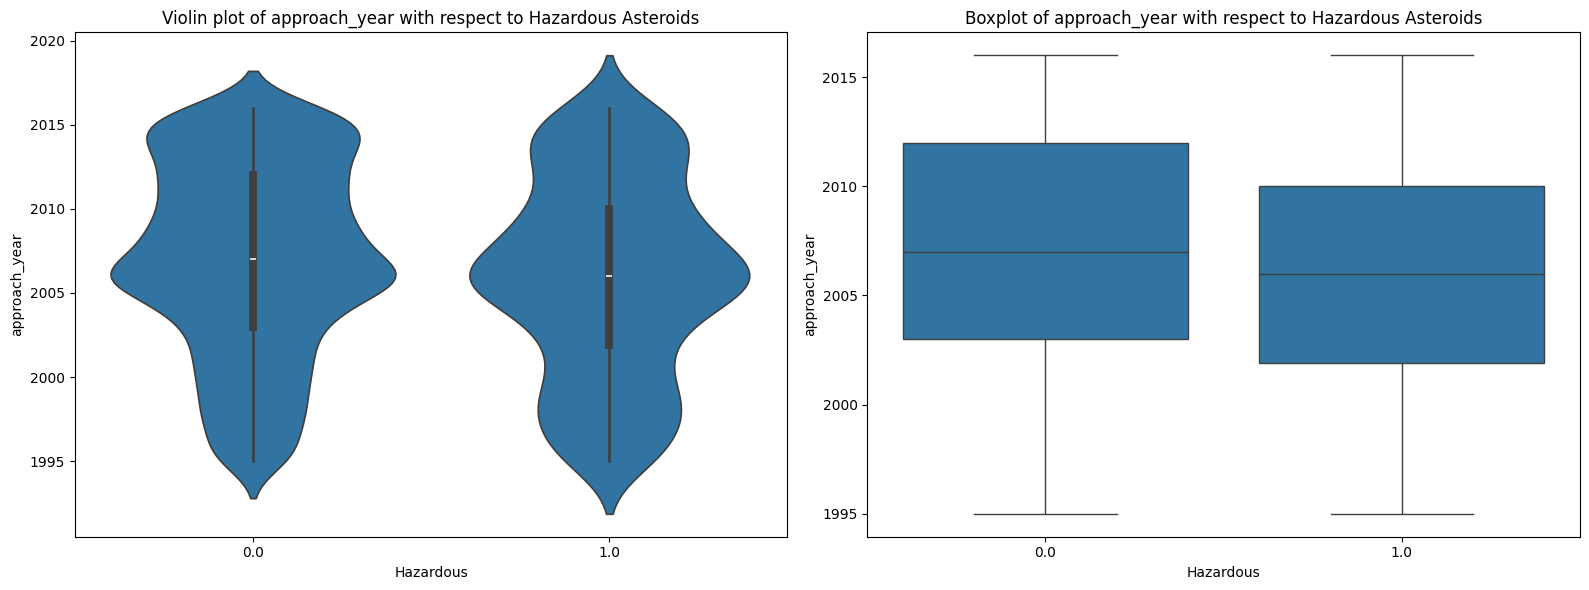

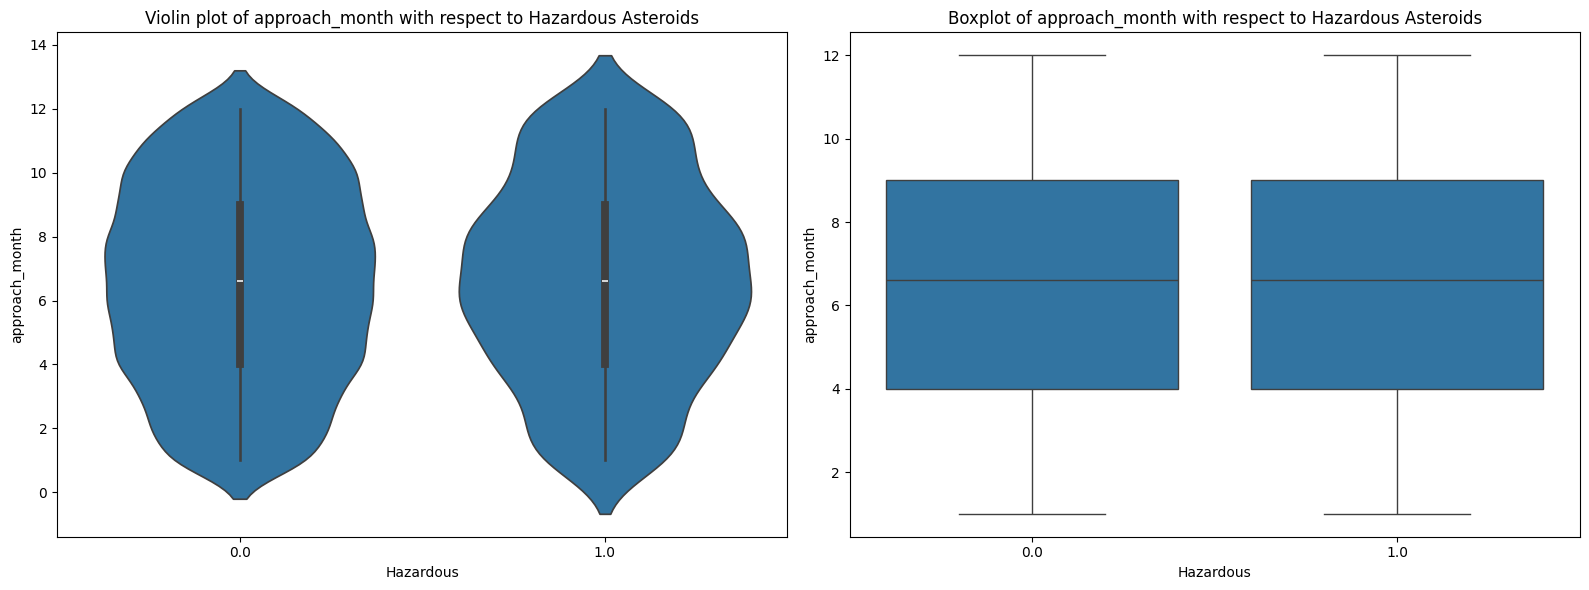

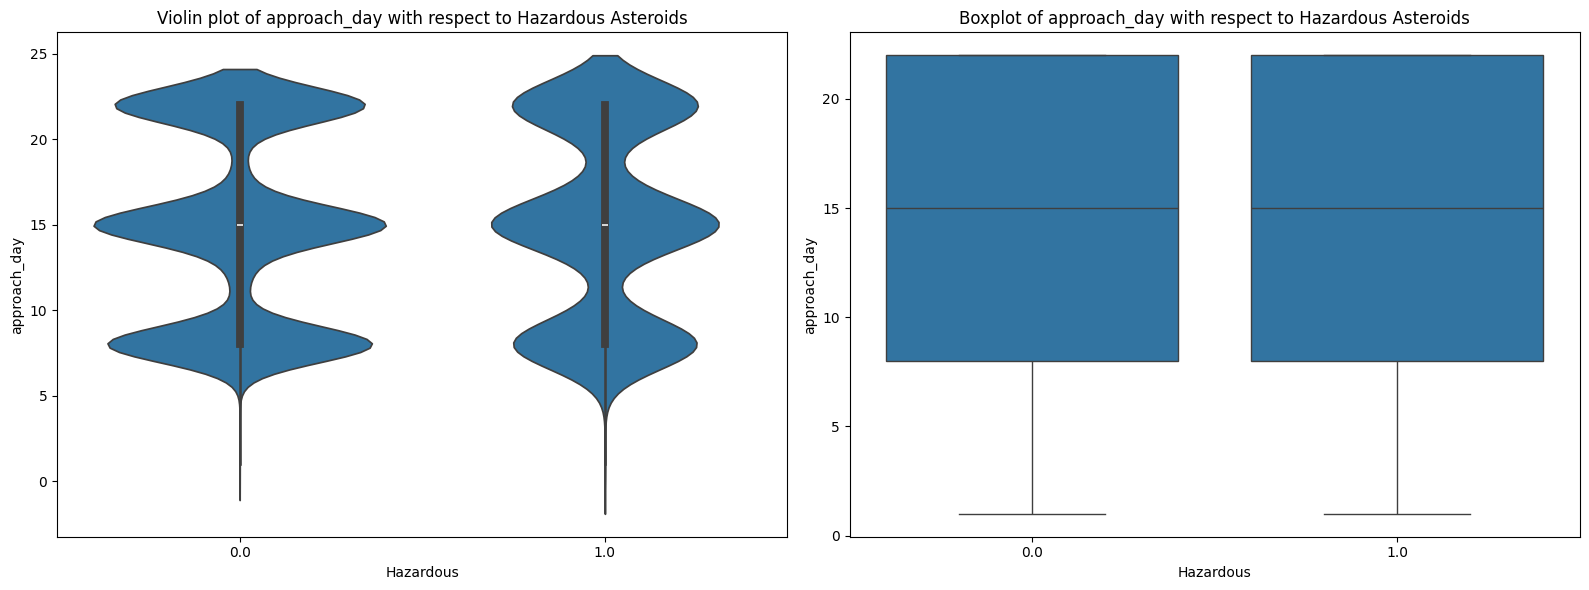

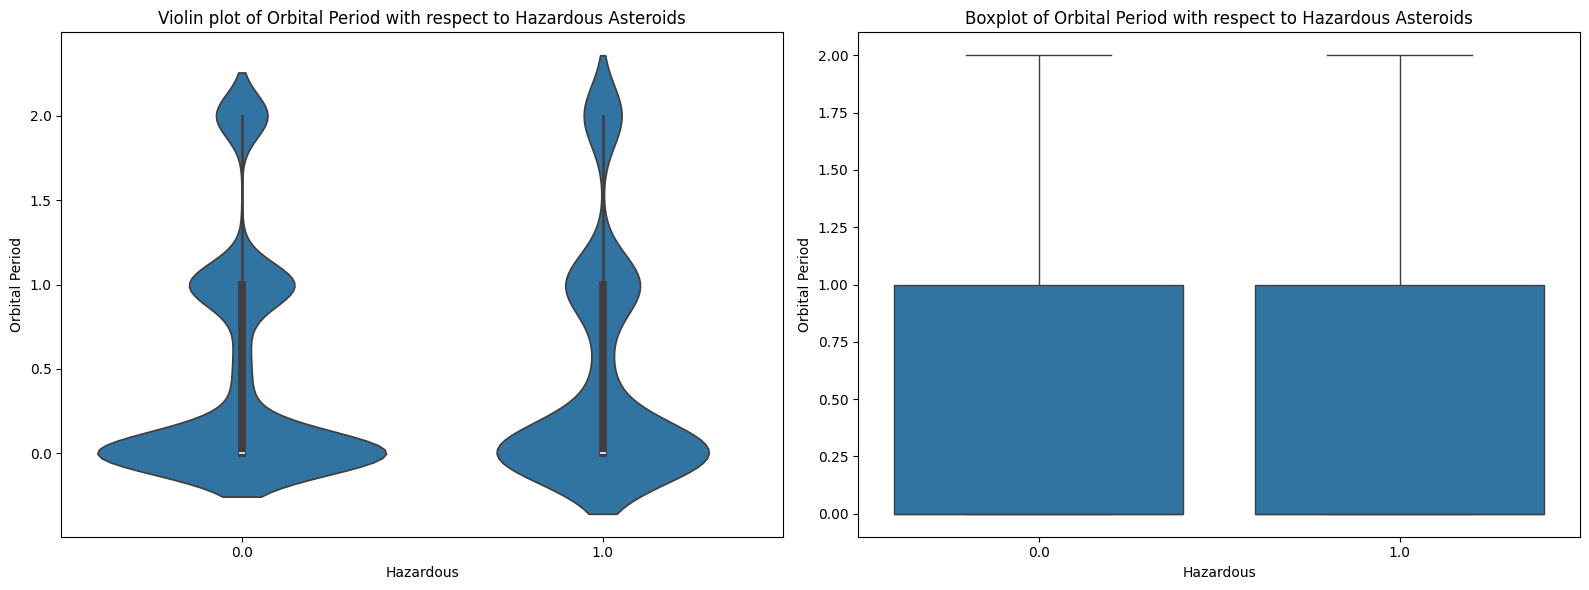

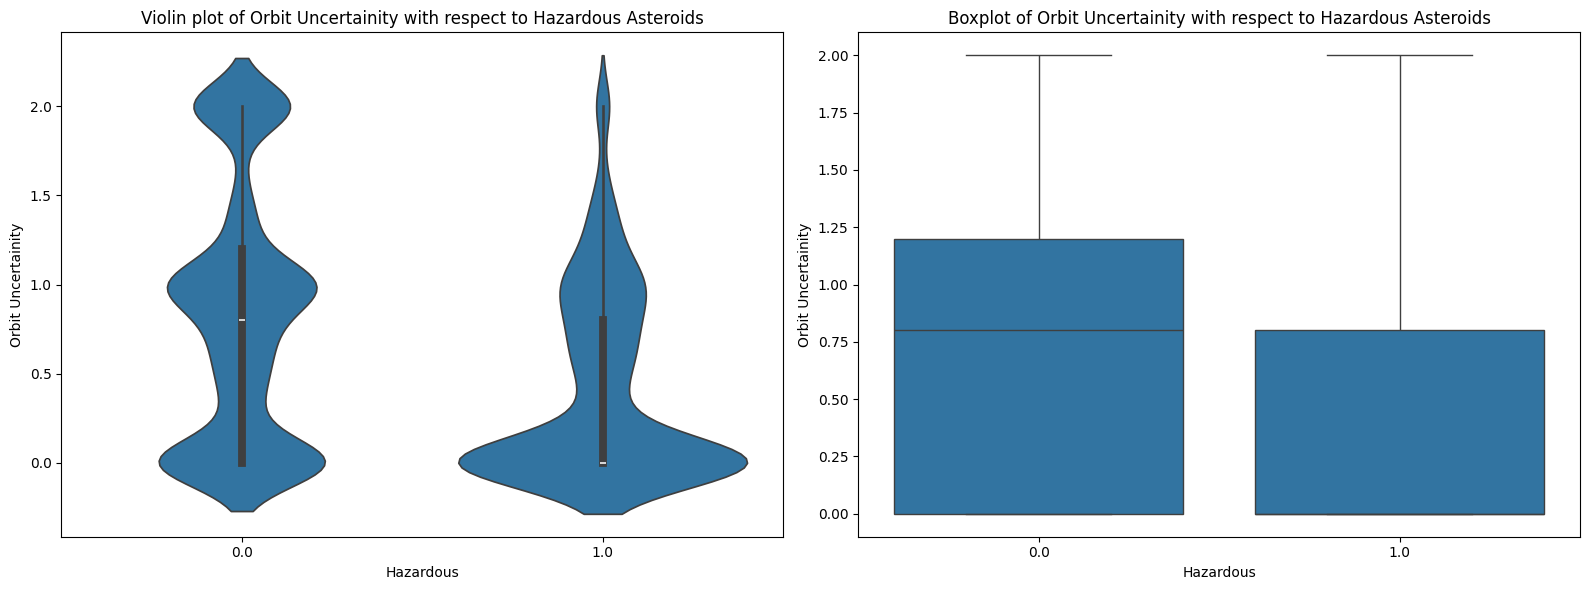

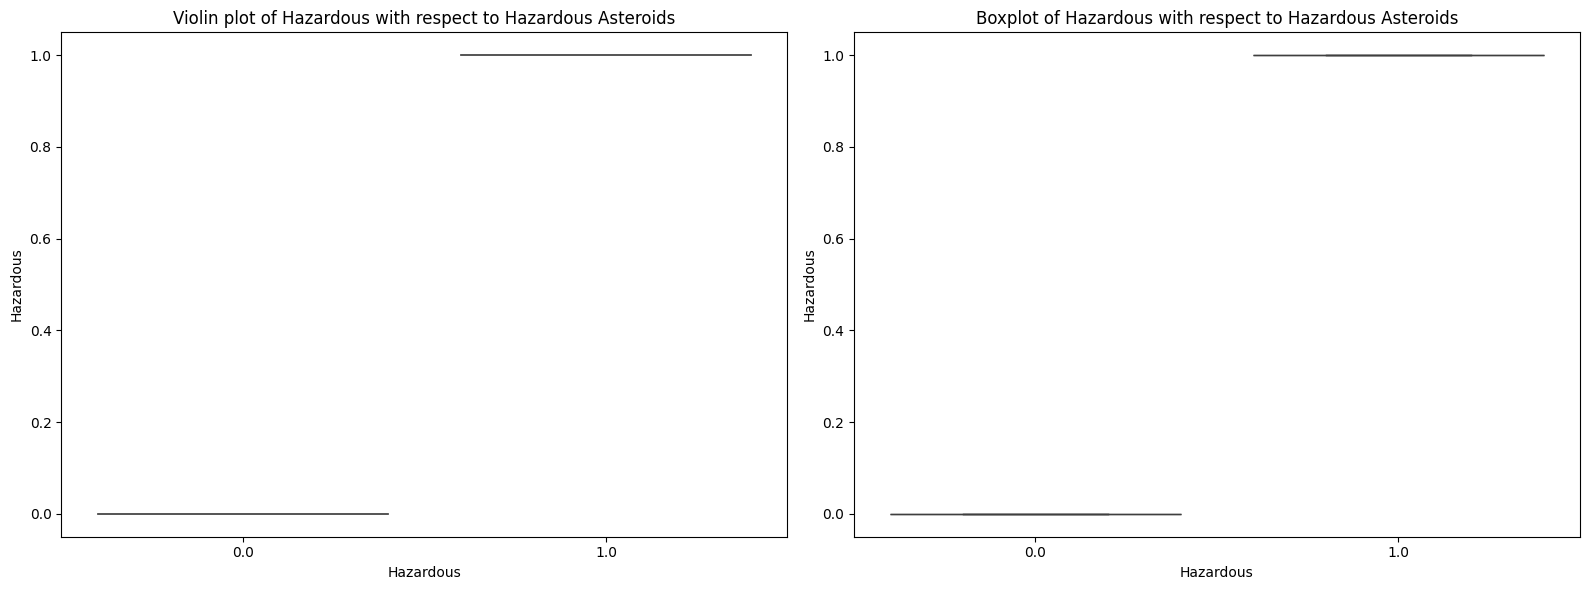

In [ ]:
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create 1 row, 2 columns of subplots

    # Violin plot for the current feature with respect to 'Hazardous'
    sns.violinplot(x='Hazardous', y=feature, data=df, ax=axes[0])
    axes[0].set_title(f"Violin plot of {feature} with respect to Hazardous Asteroids")

    # Boxplot for the current feature with respect to 'Hazardous'
    sns.boxplot(x='Hazardous', y=feature, data=df, ax=axes[1])
    axes[1].set_title(f"Boxplot of {feature} with respect to Hazardous Asteroids")

    # Show the plots
    plt.tight_layout()
    plt.show()

# CLASS IMBALANCE

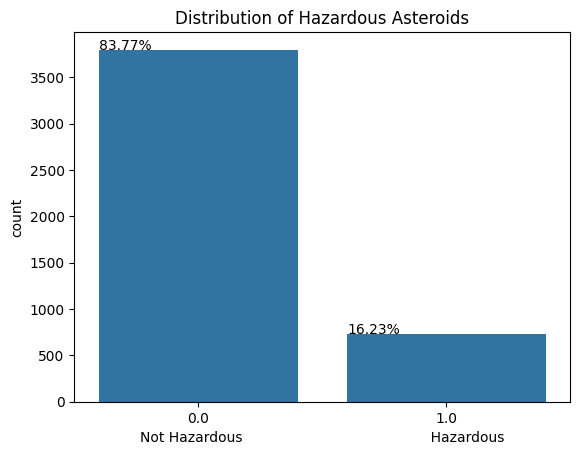

In [ ]:
ax = sns.countplot(x = "Hazardous", data = df)
plt.title('Distribution of Hazardous Asteroids')
plt.xlabel('Not Hazardous                                           Hazardous')
total = len(df["Hazardous"])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x()
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

The dataset exhibits a class imbalance, with over 80% of instances labeled as 'Not Hazardous.' This imbalance can be addressed by adjusting class weights in subsequent models.

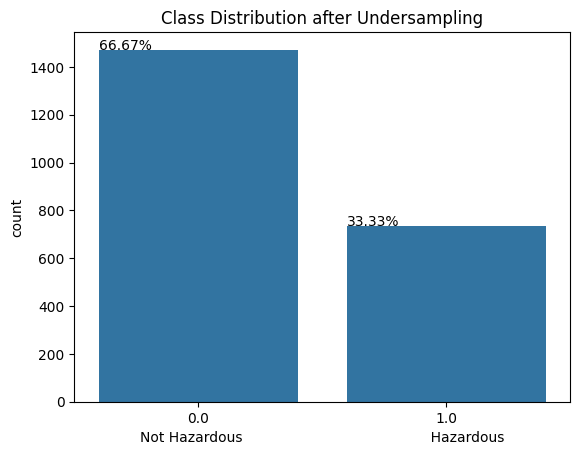

Aphelion Dist  Asc Node Longitude  Epoch Date Close Approach  \
339        1.002458          264.405602               8.636796e+11   
1279       1.462250          282.689920               1.040544e+12   
3785       2.163454          212.004391               1.400137e+12   
2948       2.191891           20.275548               1.297757e+12   
1980       1.479318          322.411201               1.158304e+12   

      Epoch Osculation  Jupiter Tisserand Invariant  Mean Anomaly  \
339          2458000.5                       4.5636     58.244024   
1279         2458000.5                       5.1940    105.628444   
3785         2456774.5                       5.4708    130.264193   
2948         2458000.5                       4.3888    180.121452   
1980         2457920.5                       5.5966     20.906560   

      Mean Motion  Miles per hour  Miss Dist.(Astronomical)  \
339      1.002602     6046.842758                  0.084364   
1279     0.860475    19444.226002                  0.472412   
3785     0.447774    15664.601128                  0.283129   
2948     0.516190    39724.375020                  0.295030   
1980     0.743497    10907.084135                  0.236320   

      Orbit Uncertainity  Orbital Period  Perihelion Arg  Perihelion Time  \
339                  0.0             0.0       87.816443     2.457924e+06   
1279                 1.0             0.0      329.673985     2.457802e+06   
3785                 2.0             1.0       53.528618     2.457293e+06   
2948                 2.0             1.0       54.049898     2.458349e+06   
1980                 2.0             0.0      126.169767     2.457972e+06   

      Semi Major Axis  approach_day  approach_month  approach_year  
339          0.988668          13.6             5.0         1997.0  
1279         1.223981          22.0             9.2         2002.0  
3785         1.692117          15.0             5.0         2014.0  
2948         1.539086          15.0             1.8         2011.0  
1980         1.206748          15.0             8.8         2006.0

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Define the feature set (all columns except 'Hazardous')
FEATURES = df.columns.difference(['Hazardous'])

# Step 2: Undersample majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# Step 3: Resample the dataset using undersampling
X_SMOTE, y_SMOTE = under.fit_resample(df[FEATURES], df["Hazardous"])

# Step 4: Visualize the class distribution after resampling
ax = sns.countplot(x='Hazardous', data=pd.DataFrame(y_SMOTE))
plt.title('Class Distribution after Undersampling')
plt.xlabel('Not Hazardous                                           Hazardous')

# Step 5: Annotate the bars with percentages
total = len(y_SMOTE)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x_coord = p.get_x()
    y_coord = p.get_y() + p.get_height() + 0.02
    ax.annotate(percentage, (x_coord, y_coord))

plt.show()

# If you want to check the transformed feature set
X_SMOTE.head()


The ratio of instances from the two classes improved from 1:5 to 1:2. Now, there are a total of 2265 instances, which is still a sufficient amount to train the model.

# NUMERICAL INTERPRETATION AND MATHEMATICAL ANALYSIS

In [ ]:
# Step 1: Combine the columns into a single date format
df['full_date'] = pd.to_datetime(df[['approach_year', 'approach_month', 'approach_day']].astype(int).astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

# Step 2: Create a feature representing the day of the year
df['day_of_year'] = df['full_date'].dt.dayofyear

In [ ]:
df['day_of_year'].head()

0      1
1      1
2    128
3    258
4    196
Name: day_of_year, dtype: int32

In [ ]:
import datetime
from datetime import datetime

# Step 1: Create the 'Miss_SemiMajor_Ratio' feature
df['Miss_SemiMajor_Ratio'] = df['Miss Dist.(Astronomical)'] / df['Semi Major Axis']

# Step 3: Create the 'Time Until Approach' feature based on the difference with the current date
current_date = pd.Timestamp(datetime.now())
df['Time Until Approach'] = (df['full_date'] - current_date).dt.days

# Display the new columns
print(df[['Miss_SemiMajor_Ratio', 'Time Until Approach']])

      Miss_SemiMajor_Ratio  Time Until Approach
0                 0.298137                -6137
1                 0.154380               -10885
2                 0.034930               -10758
3                 0.211629               -10628
4                 0.332757                -6672
...                    ...                  ...
4529              0.254447                -2964
4530              0.006424                -5886
4531              0.039921                -2964
4532              0.166849                -2964
4533              0.255129                -5886

[4534 rows x 2 columns]


In [ ]:


# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989e30  # Mass of the Sun in kg
AU_to_m = 1.496e11  # Conversion from Astronomical Units (AU) to meters



# Step 1: Calculate Perihelion Distance (q)
df['Perihelion Dist'] = 2 * df['Semi Major Axis'] - df['Aphelion Dist']

# Step 2: Calculate eccentricity
df['Eccentricity'] = (df['Aphelion Dist'] - df['Perihelion Dist']) / (df['Aphelion Dist'] + df['Perihelion Dist'])

# Step 3: Calculate average orbital velocity
df['Average Orbital Velocity (m/s)'] = np.sqrt(G * M_sun / (df['Semi Major Axis']*AU_to_m))

# Step 4: Calculate orbital period using Kepler's Third Law (in seconds, then convert to years)
df['Orbital Period (s)'] = np.sqrt(4 * np.pi**2 *(df['Semi Major Axis']*AU_to_m)**3 / (G * M_sun))
df['Orbital Period (years)'] = df['Orbital Period (s)'] / (60 * 60 * 24 * 365.25)

# Display the calculated features
print(df[['Eccentricity', 'Average Orbital Velocity (m/s)', 'Orbital Period (years)']])


      Eccentricity  Average Orbital Velocity (m/s)  Orbital Period (years)
0         0.425549                    25113.408644                1.668781
1         0.351674                    28302.740509                1.165818
2         0.348248                    24663.404994                1.761803
3         0.439128                    28910.535347                1.093825
4         0.565664                    26907.755299                1.356701
...            ...                             ...                     ...
4529      0.361512                    27641.282916                1.251532
4530      0.867016                    29684.635526                1.010465
4531      0.368055                    24096.807848                1.889026
4532      0.143891                    23828.433667                1.953574
4533      0.313748                    24535.734654                1.789449

[4534 rows x 3 columns]


In [ ]:
df['Heliocentric Distance (m)'] = df['Semi Major Axis'] * AU_to_m

# Step 1: Calculate Escape Velocity
df['Escape Velocity (m/s)'] = np.sqrt(2 * G * M_sun / df['Heliocentric Distance (m)'])

# Step 2: Calculate Specific Orbital Energy
df['Specific Orbital Energy (J/kg)'] = - (G * M_sun) / (2 * df['Heliocentric Distance (m)'])

# Display the calculated features
print(df[['Heliocentric Distance (m)', 'Escape Velocity (m/s)', 'Specific Orbital Energy (J/kg)']])

      Heliocentric Distance (m)  Escape Velocity (m/s)  \
0                  2.104889e+11           35515.723102   
1                  1.657233e+11           40026.119481   
2                  2.182400e+11           34879.321837   
3                  1.588284e+11           40885.671183   
4                  1.833520e+11           38053.312476   
...                         ...                    ...   
4529               1.737497e+11           39090.677181   
4530               1.506528e+11           41980.414155   
4531               2.286238e+11           34078.032469   
4532               2.338027e+11           33698.494061   
4533               2.205172e+11           34698.768711   

      Specific Orbital Energy (J/kg)  
0                      -3.153416e+08  
1                      -4.005226e+08  
2                      -3.041418e+08  
3                      -4.179095e+08  
4                      -3.620136e+08  
...                              ...  
4529                   -3.8202

In [ ]:
df['Specific Angular Momentum (m^2/s)'] = np.sqrt(G * M_sun * df['Heliocentric Distance (m)'] * (1 - df['Eccentricity']**2))
print(df['Specific Angular Momentum (m^2/s)'])

0       4.783573e+15
1       4.390810e+15
2       5.045608e+15
3       4.125399e+15
4       4.068416e+15
            ...     
4529    4.477848e+15
4530    2.228343e+15
4531    5.122388e+15
4532    5.513176e+15
4533    5.137352e+15
Name: Specific Angular Momentum (m^2/s), Length: 4534, dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df['Velocity at Perihelion (m/s)'] = np.sqrt(G * M_sun * (2 / (df['Perihelion Dist']*AU_to_m) - 1 / df['Heliocentric Distance (m)']))

df['Velocity at Aphelion (m/s)'] = np.sqrt(G * M_sun * (2 / (df['Aphelion Dist']*AU_to_m) - 1 / df['Heliocentric Distance (m)']))

print(df[['Velocity at Perihelion (m/s)', 'Velocity at Aphelion (m/s)']])

      Velocity at Perihelion (m/s)  Velocity at Aphelion (m/s)
0                     39561.275719                15941.935195
1                     40866.543004                19601.489665
2                     35472.914321                17147.831171
3                     46309.924331                18048.378746
4                     51087.386633                14172.329863
...                            ...                         ...
4529                  40363.859159                18928.827350
4530                 111226.043915                 7922.403381
4531                  35454.511275                16377.496899
4532                  27543.772056                20614.251739
4533                  33947.911112                17733.116864

[4534 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
P_earth = 365.25 * 24 * 3600  # Orbital period of Earth in seconds

# Assuming 'Orbital Period' column exists in the dataset (in days)
# Convert Orbital Period from days to seconds
df['Orbital Period (s)'] = df['Orbital Period'] * 24 * 3600  # Convert from days to seconds

# Step 1: Calculate Mean Motion
df['Mean Motion (rad/s)'] = 2 * np.pi / df['Orbital Period (s)']

# Step 2: Calculate Synodic Period
df['Synodic Period (days)'] = 1 / (np.abs(1 / df['Orbital Period (s)'] - 1 / P_earth)) / (24 * 3600)  # Convert to days

# Display the calculated features
print(df[['Orbital Period', 'Mean Motion (rad/s)', 'Synodic Period (days)']])

      Orbital Period  Mean Motion (rad/s)  Synodic Period (days)
0                0.0                  inf               0.000000
1                0.0                  inf               0.000000
2                1.0             0.000073               1.002745
3                0.0                  inf               0.000000
4                0.2             0.000364               0.200110
...              ...                  ...                    ...
4529             0.0                  inf               0.000000
4530             0.0                  inf               0.000000
4531             1.0             0.000073               1.002745
4532             1.0             0.000073               1.002745
4533             0.0                  inf               0.000000

[4534 rows x 3 columns]


# CORRELATION MATRIX AFTER FEATURE ENGINEERING

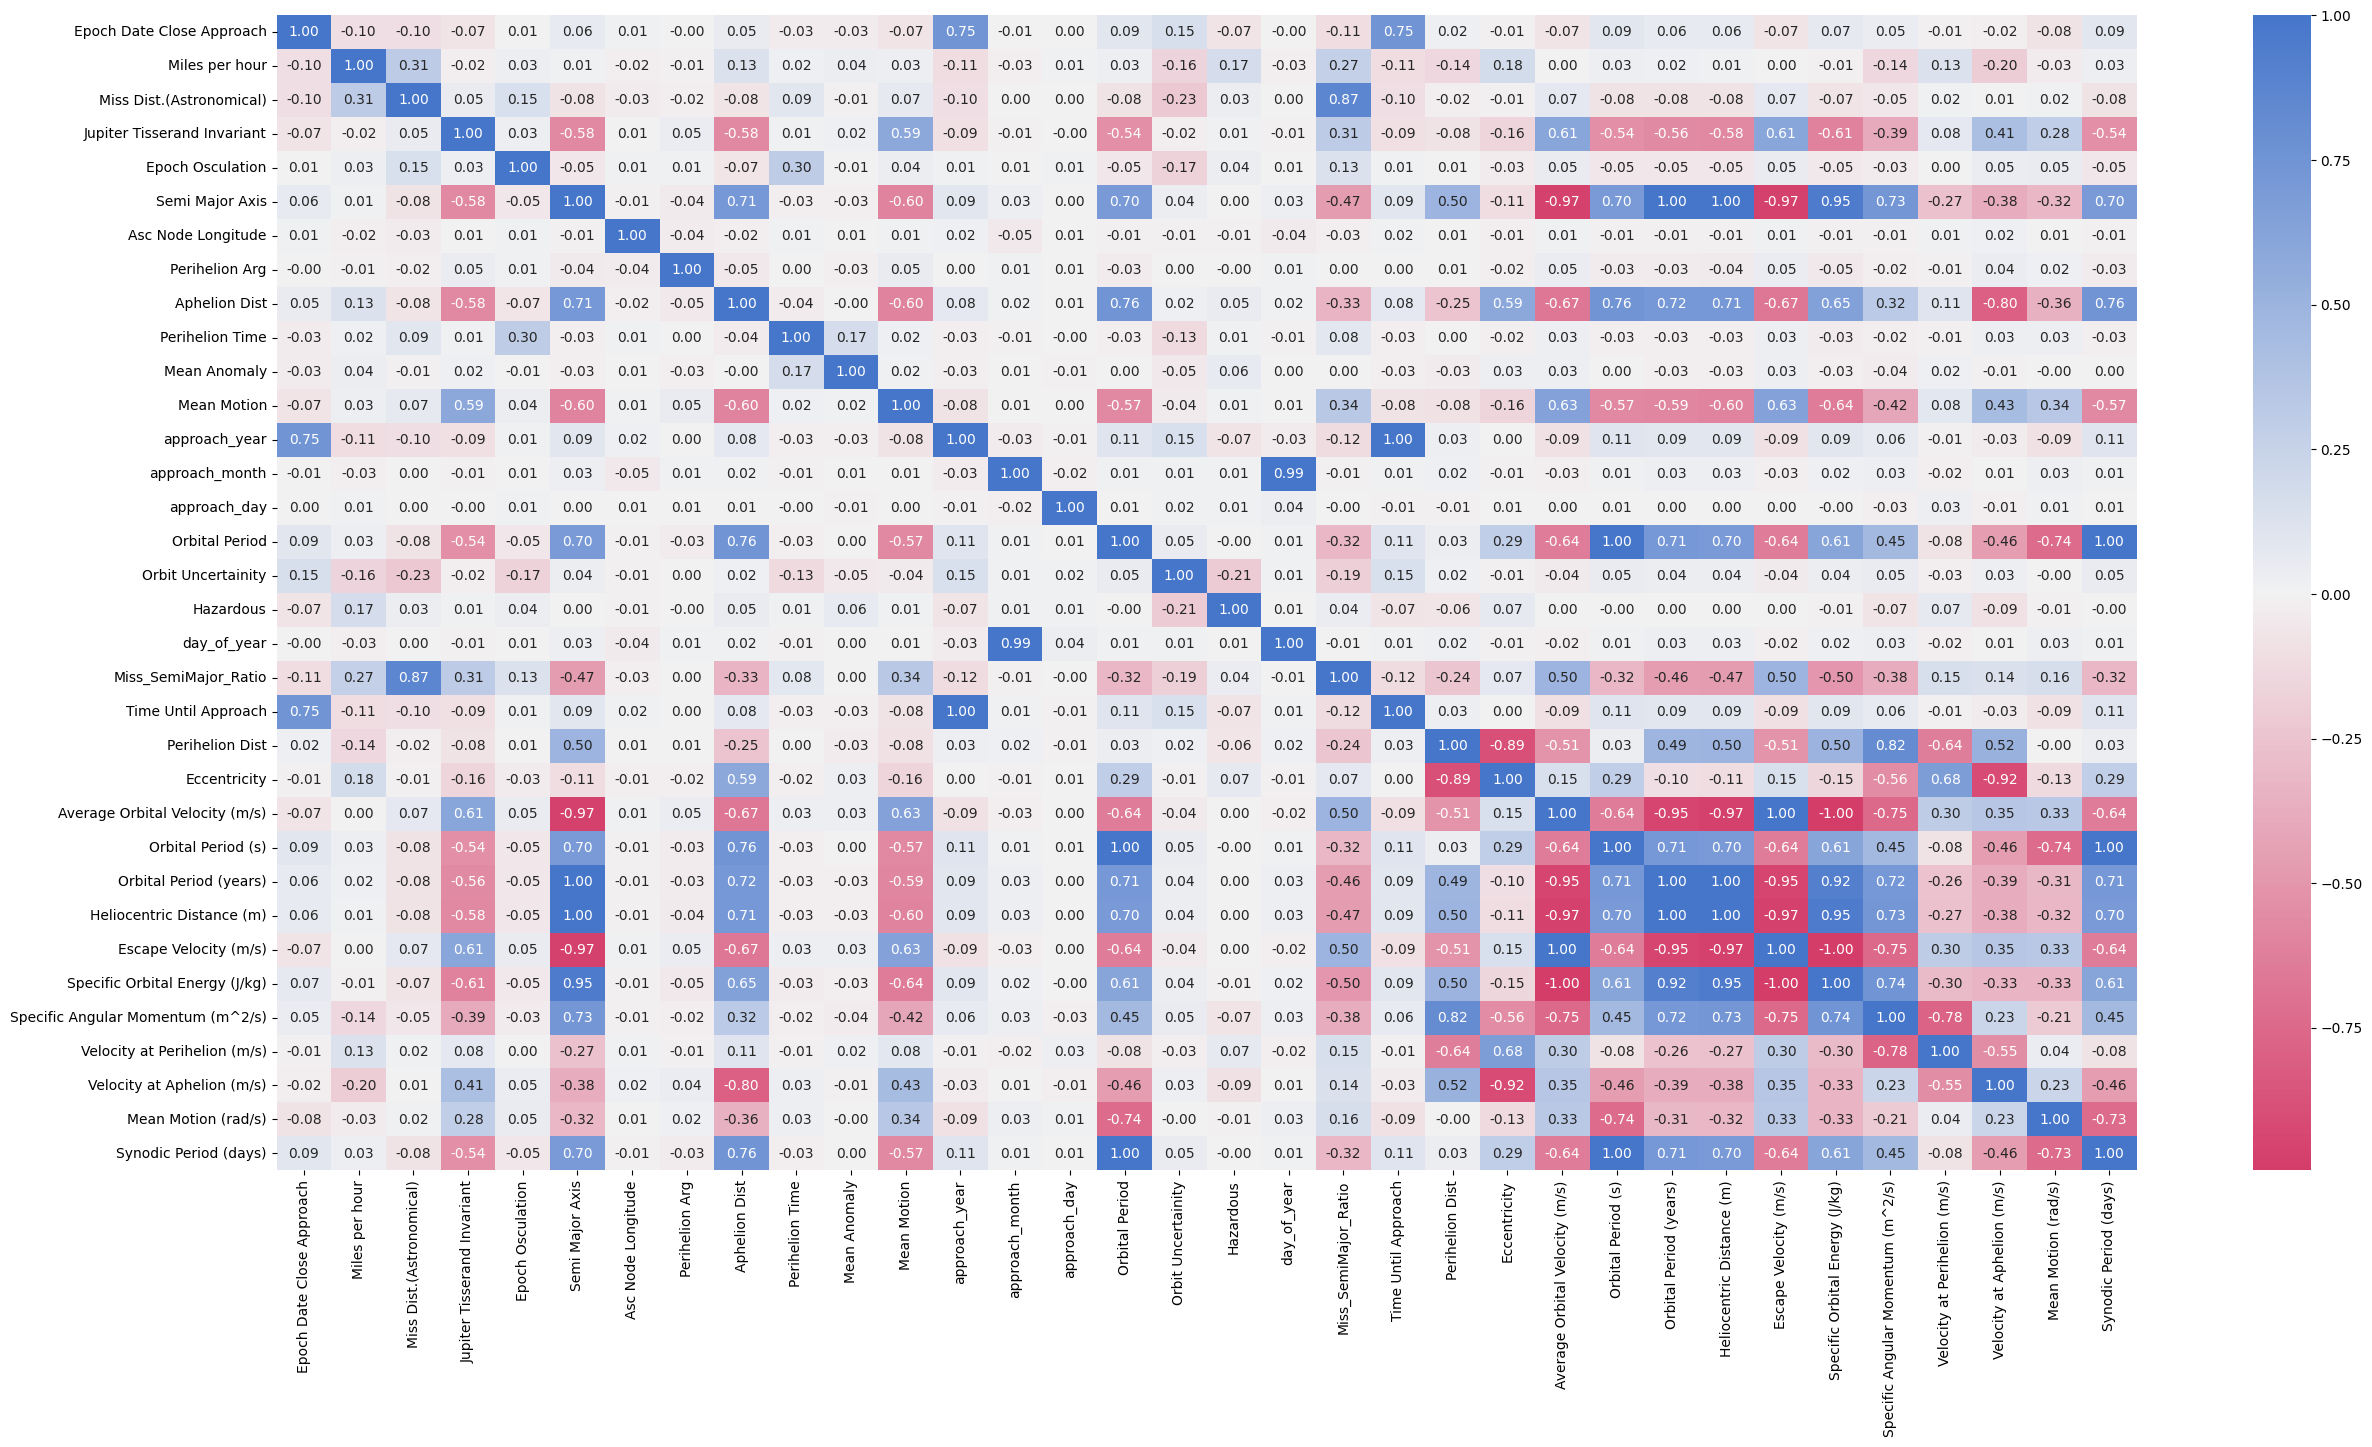

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlations for numeric columns
correlations = numeric_df.corr()

# Create heatmap
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(correlations, cmap=cmap, annot=True, fmt=".2f")  # Added annot=True to display values
plt.show()

FROM THIS ONE WE CAN SEE THAT MILES PER HOUR, ORBIT UNCERTANITY AND VELOCITY AT APHELION ARE THE MOST CORRELATED VARIABLES

# MODEL TRAINING

In [ ]:
df.drop(columns=['full_date'], inplace=True)

In [ ]:
df.drop(columns=['approach_year', 'approach_month', 'approach_day','Mean Motion (rad/s)'], inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
X = df.drop(columns=['Hazardous'])
y = df['Hazardous']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred), "\n")

Model: Logistic Regression
Confusion Matrix:
 [[695  15]
 [127   9]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       710
         1.0       0.38      0.07      0.11       136

    accuracy                           0.83       846
   macro avg       0.61      0.52      0.51       846
weighted avg       0.77      0.83      0.78       846

Accuracy Score: 0.8321513002364066 

Model: Random Forest
Confusion Matrix:
 [[708   2]
 [126  10]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       710
         1.0       0.83      0.07      0.14       136

    accuracy                           0.85       846
   macro avg       0.84      0.54      0.53       846
weighted avg       0.85      0.85      0.79       846

Accuracy Score: 0.8486997635933806 

Model: Gradient Boosting
Confusion Matrix:
 [[700  10]
 [125  11]]

Classification Report:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Confusion Matrix:
 [[677  33]
 [116  20]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       710
         1.0       0.38      0.15      0.21       136

    accuracy                           0.82       846
   macro avg       0.62      0.55      0.56       846
weighted avg       0.78      0.82      0.79       846

Accuracy Score: 0.8238770685579196 



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:21:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Confusion Matrix:
 [[687  23]
 [108  28]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       710
         1.0       0.55      0.21      0.30       136

    accuracy                           0.85       846
   macro avg       0.71      0.59      0.61       846
weighted avg       0.81      0.85      0.81       846

Accuracy Score: 0.8451536643026005 

[LightGBM] [Info] Number of positive: 546, number of negative: 2838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6098
[LightGBM] [Info] Number of data points in the train set: 3384, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161348 -> initscore=-1.648236
[LightGBM] [Info] Start training from score -1.648236


In [ ]:
#4 best performing model taken
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('cat', CatBoostClassifier(silent=True, random_state=42))
]

**PERFORMING MODEL STACKING**

In [ ]:
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=1000))

In [ ]:
stacking_model.fit(X_train, y_train)

#Evaluate the stacking model
y_pred_stacked = stacking_model.predict(X_test)

print("Model: Stacking Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stacked))
print("Accuracy Score:", accuracy_score(y_test, y_pred_stacked))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:21:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 546, number of negative: 2838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6098
[LightGBM] [Info] Number of data points in the train set: 3384, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161348 -> initscore=-1.648236
[LightGBM] [Info] Start training from score -1.648236


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 437, number of negative: 2270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6083
[LightGBM] [Info] Number of data points in the train set: 2707, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161433 -> initscore=-1.647602
[LightGBM] [Info] Start training from score -1.647602
[LightGBM] [Info] Number of positive: 437, number of negative: 2270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6090
[LightGBM] [Info] Number of data points in the train set: 2707, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161433 -> initscore=-1.647602
[LightGBM]

**PERFORMING HYPERPARAMETER TUNING**

In [ ]:
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, 15],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'lgbm__n_estimators': [100, 200],
    'lgbm__learning_rate': [0.05, 0.1],
    'cat__depth': [6, 8],
    'cat__iterations': [100, 200]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=stacking_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled (you can adjust this)
    scoring='accuracy',  # Optimize for accuracy
    cv=3,  # 3-fold cross-validation
    verbose=2,  # Print progress
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 546, number of negative: 2838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6098
[LightGBM] [Info] Number of data points in the train set: 3384, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161348 -> initscore=-1.648236
[LightGBM] [Info] Start training from score -1.648236


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Info] Number of positive: 437, number of negative: 2270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6083
[LightGBM] [Info] Number of data points in the train set: 2707, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161433 -> initscore=-1.647602
[LightGBM] [Info] Start training from score -1.647602
[LightGBM] [Info] Number of positive: 437, number of negative: 2270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6090
[LightGBM] [Info] Number of data points in the train set: 2707, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161433 -> initscore=-1.647602
[LightGBM] [Info] Start training from score -1.647602
[LightGBM] [Info] Nu

RandomizedSearchCV(cv=3,
                   estimator=StackingClassifier(estimators=[('rf',
                                                             RandomForestClassifier(random_state=42)),
                                                            ('xgb',
                                                             XGBClassifier(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           device=None,
                                                                           early_stopping_rounds=None,
                                                                           enable_categorical=False,
                                                                           eval_metric='logloss',
                                                                           feature_types=None,
                                                                           g...
                                                final_estimator=LogisticRegression(max_iter=1000)),
                   n_jobs=-1,
                   param_distributions={'cat__depth': [6, 8],
                                        'cat__iterations': [100, 200],
                                        'lgbm__learning_rate': [0.05, 0.1],
                                        'lgbm__n_estimators': [100, 200],
                                        'rf__max_depth': [5, 10, 15],
                                        'rf__n_estimators': [100, 200, 300],
                                        'xgb__max_depth': [3, 5, 7],
                                        'xgb__n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:

print("Best Parameters for Stacking Classifier:", random_search.best_params_)
print("Best Score for Stacking Classifier:", random_search.best_score_)

Best Parameters for Stacking Classifier: {'xgb__n_estimators': 200, 'xgb__max_depth': 7, 'rf__n_estimators': 300, 'rf__max_depth': 15, 'lgbm__n_estimators': 100, 'lgbm__learning_rate': 0.05, 'cat__iterations': 100, 'cat__depth': 8}
Best Score for Stacking Classifier: 0.8424940898345153


In [ ]:
best_stacking_model = random_search.best_estimator_
y_pred_stacked = best_stacking_model.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_stacked))

Accuracy on Test Set: 0.8451536643026005


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:41:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:41:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:41:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:41:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:41:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 378, number of negative: 1737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6228
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.178723 -> initscore=-1.525021
[LightGBM] [Info] Start training from score -1.525021
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 304, number of negative: 1811
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

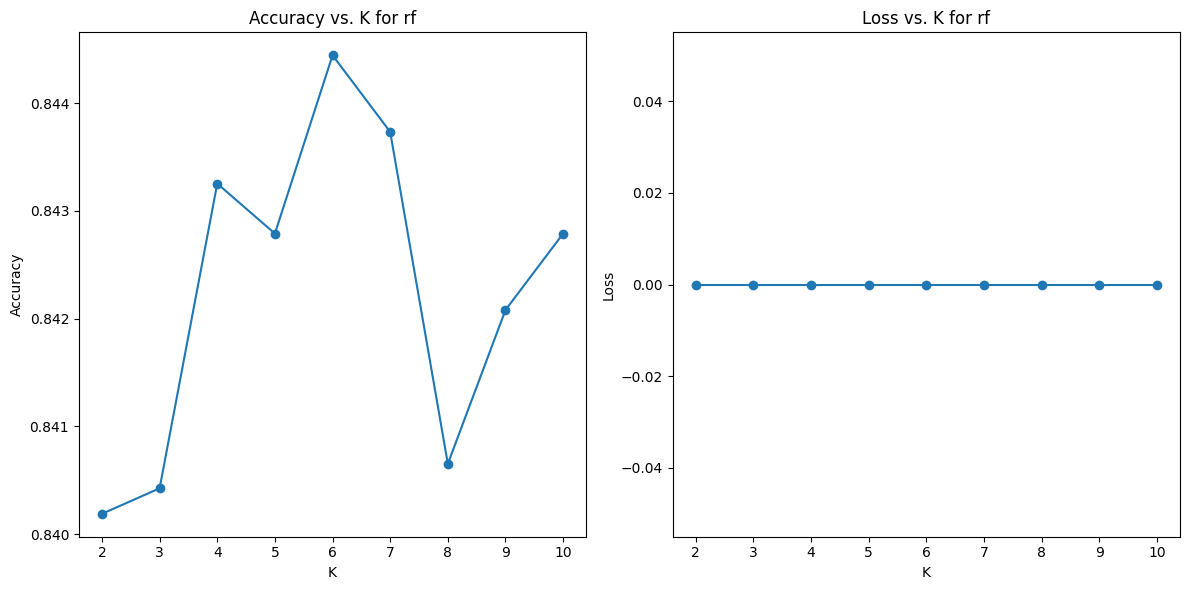

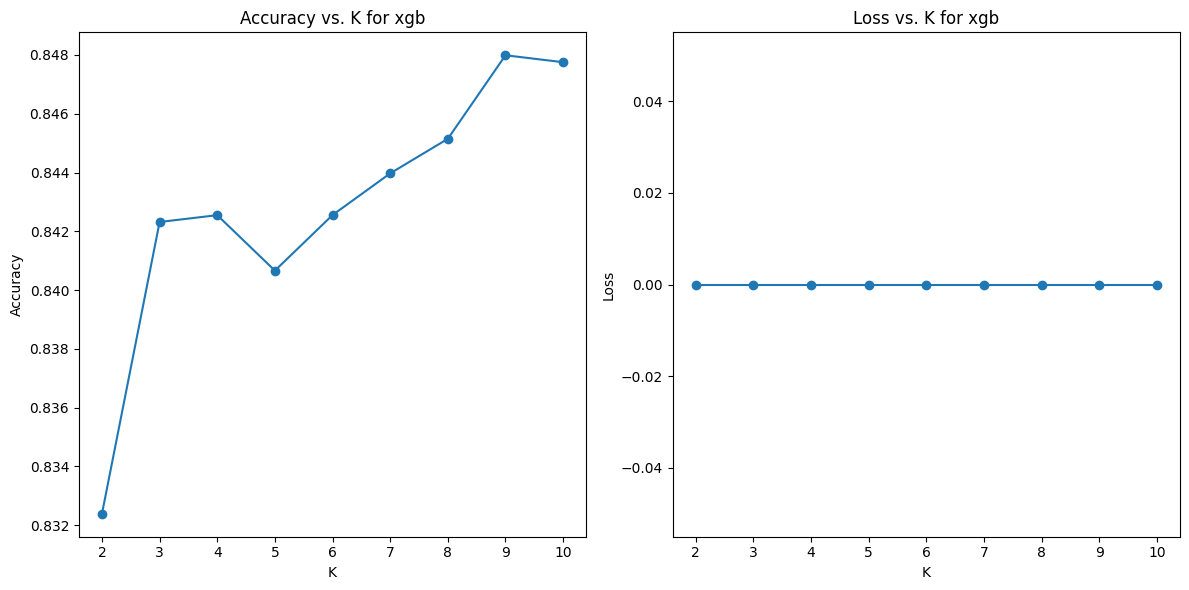

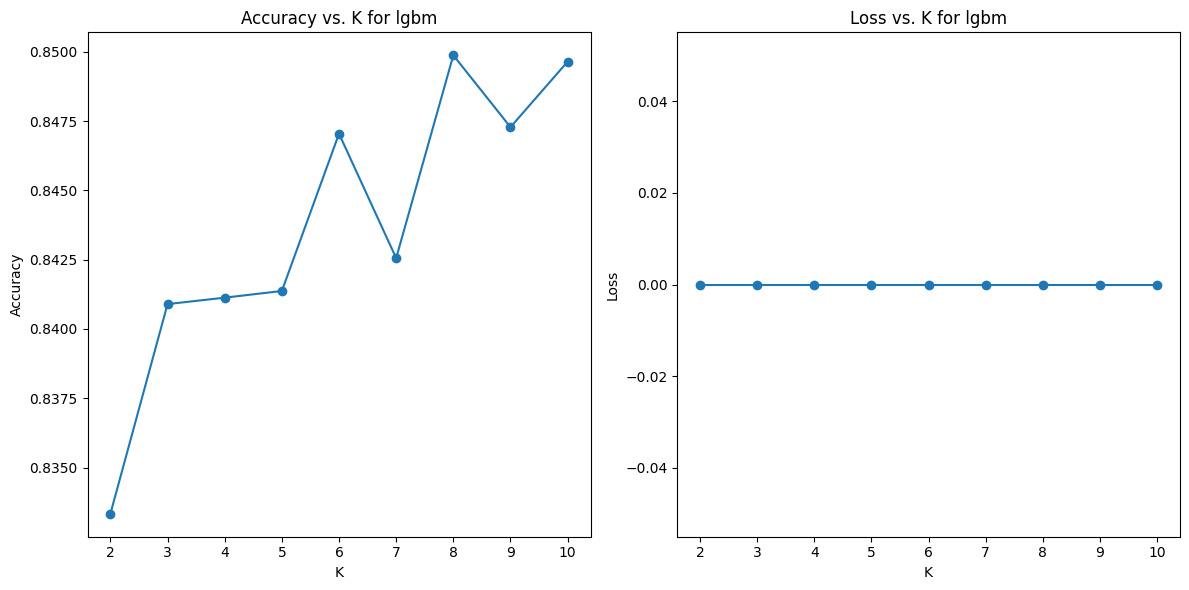

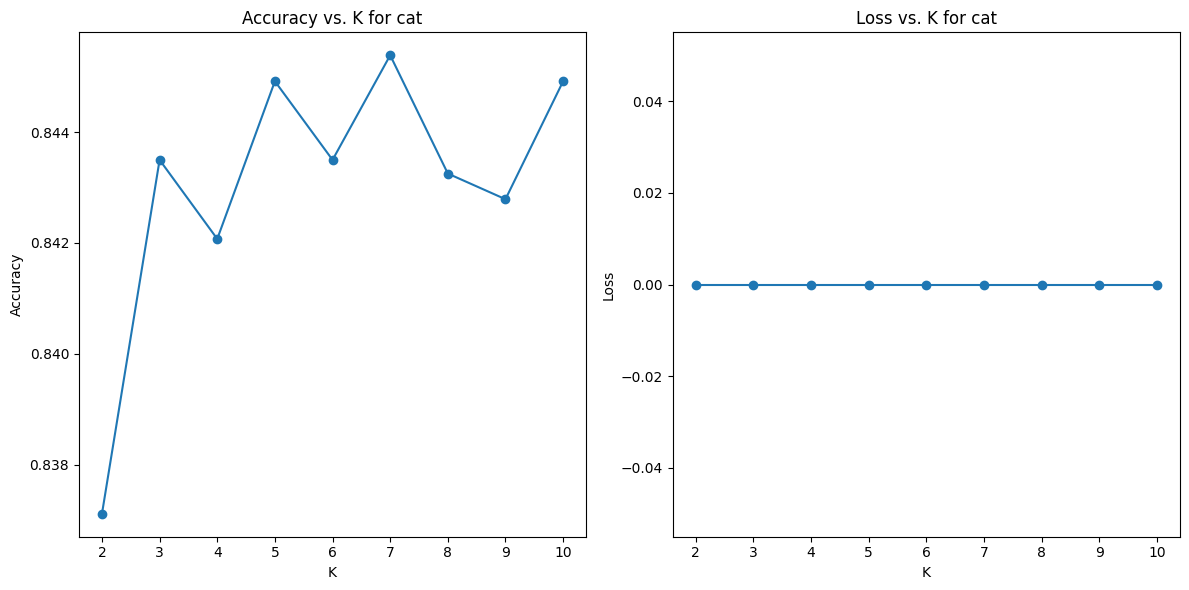

In [ ]:
from sklearn.model_selection import KFold
def train_and_evaluate_model(model, X, y, k_values):
    """Trains and evaluates a given model using K-Fold cross-validation.

    Args:
        model: The model to train and evaluate.
        X: The feature data.
        y: The target data.
        k_values: A list of K values for cross-validation.

    Returns:
        A dictionary containing the mean accuracies and losses for each K value.
    """
    results = {}
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        fold_accuracies = []
        fold_losses = []  # To store losses for each fold

        for fold, (train_index, val_index) in enumerate(kf.split(X)):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
            fold_accuracies.append(accuracy)

            # Calculate and store loss (assuming your model has a loss function)
            # Example for Logistic Regression:
            if isinstance(model, LogisticRegression):
                loss = model.score(X_val, y_val)
            # Add similar loss calculations for other models if needed
            else:
                loss=0
            fold_losses.append(loss)

        results[k] = {
            'accuracy': np.mean(fold_accuracies),
            'loss': np.mean(fold_losses)
        }
    return results

# Assuming base_models is a list of tuples like [('gb', GradientBoostingClassifier(...)), ...]
# ... (Your code to load and preprocess data) ...

# Define the range of K values
k_values = range(2, 11)
numerical_features = X.select_dtypes(include=['number']).columns
X = X[numerical_features]
# Train and evaluate each model
all_results = {}
for model_name, model in base_models:
    all_results[model_name] = train_and_evaluate_model(model, X, y, k_values)

# Plotting the results
for model_name, results in all_results.items():
    accuracies = [results[k]['accuracy'] for k in k_values]
    losses = [results[k]['loss'] for k in k_values]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(k_values, accuracies, marker='o')
    ax1.set_title(f'Accuracy vs. K for {model_name}')
    ax1.set_xlabel('K')
    ax1.set_ylabel('Accuracy')

    ax2.plot(k_values, losses, marker='o')
    ax2.set_title(f'Loss vs. K for {model_name}')
    ax2.set_xlabel('K')
    ax2.set_ylabel('Loss')

    plt.tight_layout()
    plt.show()

**ANOMALY DETECTION **

In [ ]:
#ANOMALY DETECTION
#REMOVING THE ROWS WITH NAN ANOMALY VALUES
df=df[df['Mean Anomaly'].isna()==False]
#COMPUTING Z SCORE FOR THE MEAN ANOMALY COLUMN
Z_SCORE=(df['Mean Anomaly']-df['Mean Anomaly'].mean())/df['Mean Anomaly'].std()
# FINDING THE THRESHOLD TO SET FOR WHICH THE ALGO WILL WORK THE BEST
Z_SCORE.mean()
equals=0
for i in np.arange(0.5, 2.0, 0.1):
    equals_of_anomaly=((Z_SCORE>i)==df.iloc[:,-1]).sum()
    if(equals_of_anomaly>equals):
        equals=equals_of_anomaly
    else:
        break
# Our threshold is founded and our accuarcy is
accuracy=equals/len(df)
accuracy


0.6059101654846336

**USUING LIBRARIES**

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
model = IsolationForest(contamination='auto', random_state=42)  # Adjust contamination if needed
x = df.select_dtypes(include=['number']) # Selecting only numerical features for anomaly detection

# 2. Create and fit the IsolationForest model
 # You can adjust 'contamination' if needed
model.fit(x)

# 3. Predict anomalies
anomaly_predictions = model.predict(x)

# 4. Add anomaly predictions to your DataFrame
df['anomaly'] = anomaly_predictions

count1=df['anomaly'].value_counts()[-1]


1034